# Import Libraries

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
# SQL
import sqlite3
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
#-----------------------------------------------------------
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier


# Data Collection
Objectives: 
* Describing how data was collected (API, Web Scraping, etc.)
* Cleaning the requested data
* Converting the data into a Data Frame

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

<div style="background-color: lightgray; padding: 10px; border-radius: 5px;">
    
# Data Wrangling
Objectives:
* Filtering the Data
* Dealing with missing values
* Determine Training Labels
* Using One Hot Encoding to prepare the data to a binary classification
    
</div>


In [3]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Id duplication data test
data_train[data_train['Id'].duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [6]:
# Identify all the features containg missing values 
nan_columns = data_train.columns[data_train.isnull().any()]
print("Number of Attributes containing NaN values: \n",len(nan_columns))
print("Columns with NaN values: \n", nan_columns.values)

Number of Attributes containing NaN values: 
 19
Columns with NaN values: 
 ['LotFrontage' 'Alley' 'MasVnrType' 'MasVnrArea' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Electrical' 'FireplaceQu'
 'GarageType' 'GarageYrBlt' 'GarageFinish' 'GarageQual' 'GarageCond'
 'PoolQC' 'Fence' 'MiscFeature']


In [7]:
# Identify all the categorical features.
categorical_features = data_train.select_dtypes(include=['object']).columns
print("Number of categorical features: \n",len(categorical_features))
print("Columns with data type 'object': \n", categorical_features.values)

Number of categorical features: 
 43
Columns with data type 'object': 
 ['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']


In [8]:
#  Identify all the numerical features.
numerical_features = data_train.drop('Id', axis=1).select_dtypes(include=['int64', 'float64']).columns
print("Number of numerical features: \n",len(numerical_features))
print("Columns with data type 'object': \n", numerical_features.values)

Number of numerical features: 
 37
Columns with data type 'object': 
 ['MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice']


<div style="background-color: lightblue; padding: 12px; border-radius: 5px;">

<b>Infer<b>
* The Data is composed of 80 Attributes,Key Attribute "Id" and 79 features; and 1459 entries (residential homes).
* The 'Id' column consists of unique values and there is not any duplicated id.
* 33 out of 79 features are contating NaN values (nan_columns).
* There are 43 categorical features and 37 numerical features.
</div>

<div style="background-color: lightgreen; padding: 12px; border-radius: 5px;">

<b>Next Step<b>

Dealing with missing values of the attributes having the numeric values.

</div>

In [9]:
numeric_nan_columns = list(set(nan_columns) & set(numerical_features))
print(numeric_nan_columns,'\n')

['LotFrontage', 'GarageYrBlt', 'MasVnrArea'] 



In [10]:
data_train[numeric_nan_columns]

,LotFrontage,GarageYrBlt,MasVnrArea
0,65.0,2003.0,196.0
1,80.0,1976.0,0.0
2,68.0,2001.0,162.0
3,60.0,1998.0,0.0
4,84.0,2000.0,350.0
...,...,...,...
1455,62.0,1999.0,0.0
1456,85.0,1978.0,119.0
1457,66.0,1941.0,0.0
1458,68.0,1950.0,0.0


In [11]:
# Finding the description of the attributes
def get_attribute_description(file_path, attribute_name):
    """
    This function reads a text file containing attributes and their descriptions, 
    stores them in a dictionary, and returns the description for a specific attribute.

    :param file_path: Path to the text file
    :param attribute_name: The name of the attribute to look up
    :return: The description of the specified attribute, or a message if not found
    """
    # Initialize an empty dictionary to hold the attributes and descriptions
    attributes_dict = {}

    # Open the text file
    with open(file_path, 'r') as file:
        current_attribute = None
        current_description = []
        
        for line in file:
            line = line.rstrip()  # Remove trailing whitespace
            if not line:
                continue  # Skip empty lines
            
            # Check if the line is a potential attribute name followed by a colon
            if ':' in line:
                if current_attribute:
                    # If there was a previous attribute, save it before moving to the next one
                    attributes_dict[current_attribute] = '\n'.join(current_description).strip()
                # Extract attribute name and start a new description
                current_attribute, description_part = line.split(':', 1)
                current_attribute = current_attribute.strip()
                current_description = [description_part.strip()]
            else:
                # If the line doesn't contain a colon, it's part of the current description
                current_description.append(line)
        
        # Don't forget to add the last attribute after exiting the loop
        if current_attribute:
            attributes_dict[current_attribute] = '\n'.join(current_description).strip()

    # Look up the requested attribute
    if attribute_name in attributes_dict:
        return f"{attribute_name}:\n{attributes_dict[attribute_name]}"
    else:
        return f"Attribute '{attribute_name}' not found."

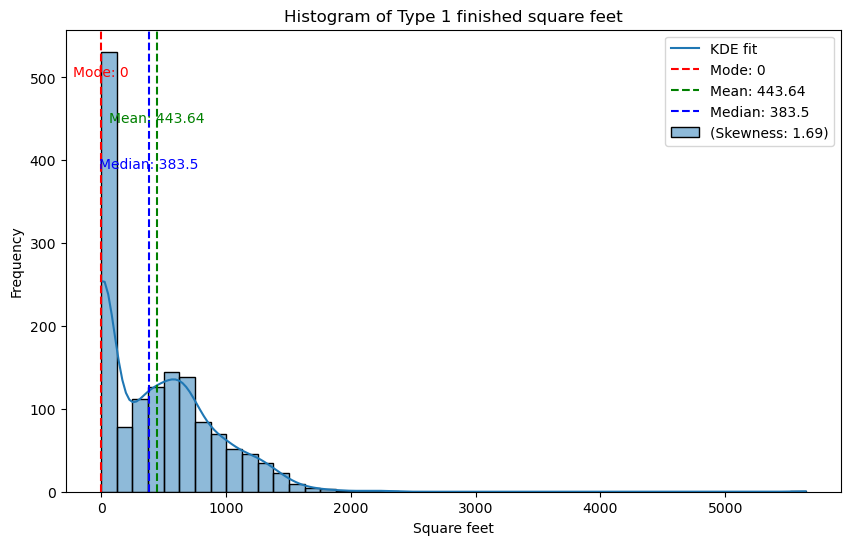

In [12]:
# defining a function to Calculate mode, mean, and median and plot the histogram
def analyze_column(dataframe, column_name, xlabel,title):
    # Calculate mode, mean, and median
    mode_value = dataframe[column_name].mode()[0]  # Mode can return multiple values; take the first
    mean_value = dataframe[column_name].mean()
    median_value = dataframe[column_name].median()
    skewness_value = dataframe[column_name].dropna().skew()  # Drop NaN values before calculating skewness

    
    # Plot the histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(dataframe[column_name], kde=True,label=f'(Skewness: {skewness_value:.2f})',line_kws={'label': "KDE fit"})
    
    # Plot vertical lines for mode, mean, and median
    plt.axvline(mode_value, color='red', linestyle='--', label=f'Mode: {mode_value}')
    plt.axvline(mean_value, color='green', linestyle='--', label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='blue', linestyle='--', label=f'Median: {median_value}')
    
    # Annotate the values
    plt.text(mode_value, plt.ylim()[1] * 0.9, f'Mode: {mode_value}', color='red', ha='center')
    plt.text(mean_value, plt.ylim()[1] * 0.8, f'Mean: {mean_value:.2f}', color='green', ha='center')
    plt.text(median_value, plt.ylim()[1] * 0.7, f'Median: {median_value}', color='blue', ha='center')    
    
    # Add labels and title
    plt.title(f'Histogram of {title}')
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.legend()
    
    # Show plot
    plt.show()

analyze_column(data_train, 'BsmtFinSF1', xlabel='Square feet',title= 'Type 1 finished square feet')

## Dealing with 'LotFrontage' attribute 	

In [13]:
# 'TotalBsmtSF' attribute description
attribute_name = 'LotFrontage'
print(get_attribute_description('data_description.txt', attribute_name))

data_train_BsmtFinSF2=data_train[attribute_name].value_counts(dropna=False).reset_index()
data_train_BsmtFinSF2.sort_values(attribute_name)

LotFrontage:
Linear feet of street connected to property


,LotFrontage,count
10,21.0,23
12,24.0,19
51,30.0,6
66,32.0,5
108,33.0,1
...,...,...
98,168.0,1
84,174.0,2
97,182.0,1
78,313.0,2


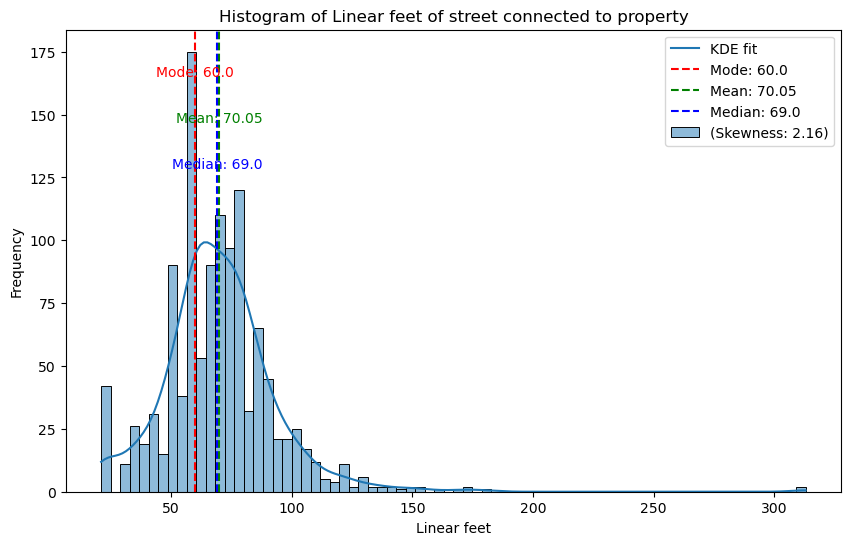

In [14]:
analyze_column(data_train, 'LotFrontage', xlabel='Linear feet',title= 'Linear feet of street connected to property')

<div style="background-color: lightblue; padding: 12px; border-radius: 5px;">
    
<b>Infer
    
For imputing the missing value in this context Median is  best choice given the moderate positive skew. It ensures the imputed value is a robust measure of central tendency, not influenced by the skew.
</div>

In [15]:
# Calculate the median
median_value = data_train['LotFrontage'].median()

# Impute the missing value with the median
data_train['LotFrontage'].fillna(median_value, inplace=True)

In [16]:
data_train['LotFrontage'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1460 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [17]:
numeric_nan_columns.remove('LotFrontage')
numeric_nan_columns

['GarageYrBlt', 'MasVnrArea']

## Dealing with 'MasVnrArea' attribute 	

In [18]:
# 'MasVnrArea' attribute description
attribute_name = 'MasVnrArea'
print(get_attribute_description('data_description.txt', attribute_name))

data_train_BsmtFinSF2=data_train[attribute_name].value_counts(dropna=False).reset_index()
data_train_BsmtFinSF2.sort_values(attribute_name)

MasVnrArea:
Masonry veneer area in square feet


,MasVnrArea,count
0,0.0,861
82,1.0,2
155,11.0,1
187,14.0,1
6,16.0,7
...,...,...
267,1129.0,1
295,1170.0,1
201,1378.0,1
241,1600.0,1


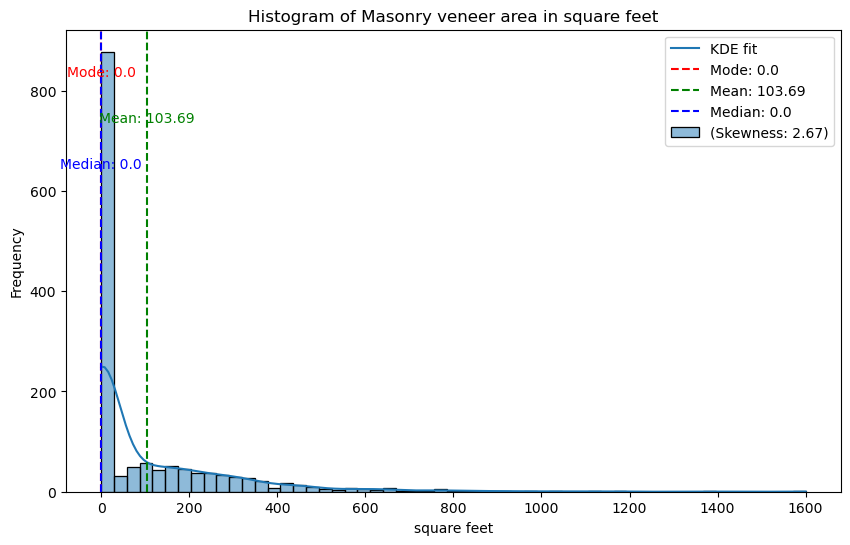

In [19]:
analyze_column(data_train, 'MasVnrArea', xlabel='square feet',title= 'Masonry veneer area in square feet')

In [20]:
data_train['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

<div style="background-color: lightblue; padding: 12px; border-radius: 5px;">
    
<b>Infer
    
For imputing the missing value in this context, the Mode can be a choice for imputation. 
</div>

In [21]:
# Calculate the mode
mode_value = data_train['MasVnrArea'].mode()[0]

# Impute the missing value with the mode
data_train['MasVnrArea'].fillna(mode_value, inplace=True)

In [22]:
data_train['MasVnrArea'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MasVnrArea
Non-Null Count  Dtype  
--------------  -----  
1460 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [23]:
numeric_nan_columns.remove('MasVnrArea')
numeric_nan_columns

['GarageYrBlt']

## Dealing with 'GarageYrBlt' attribute 	

In [24]:
# 'GarageYrBlt' attribute description
attribute_name = 'MasVnrArea'
print(get_attribute_description('data_description.txt', attribute_name))

data_train_BsmtFinSF2=data_train[attribute_name].value_counts(dropna=False).reset_index()
data_train_BsmtFinSF2.sort_values(attribute_name)

MasVnrArea:
Masonry veneer area in square feet


,MasVnrArea,count
0,0.0,869
105,1.0,2
154,11.0,1
186,14.0,1
5,16.0,7
...,...,...
257,1115.0,1
266,1129.0,1
294,1170.0,1
200,1378.0,1


Text(0.5, 0, 'Year')

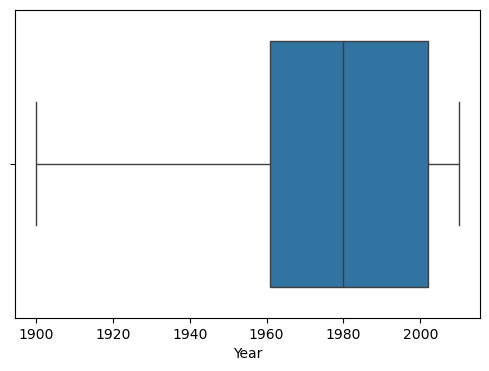

In [25]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data_train['GarageYrBlt'].dropna())
plt.xlabel('Year')

<div style="background-color: lightblue; padding: 12px; border-radius: 5px;">
    
<b>Infer
    
The house with the Id of 92, the Year garage was built is 2207. This data is clearly an outlier and not compatible with the context. So this value should be replaced too.
 
</div>

In [26]:
# replacing the data 2207 with NaN
data_train['GarageYrBlt'].replace(2207, np.nan, inplace=True)

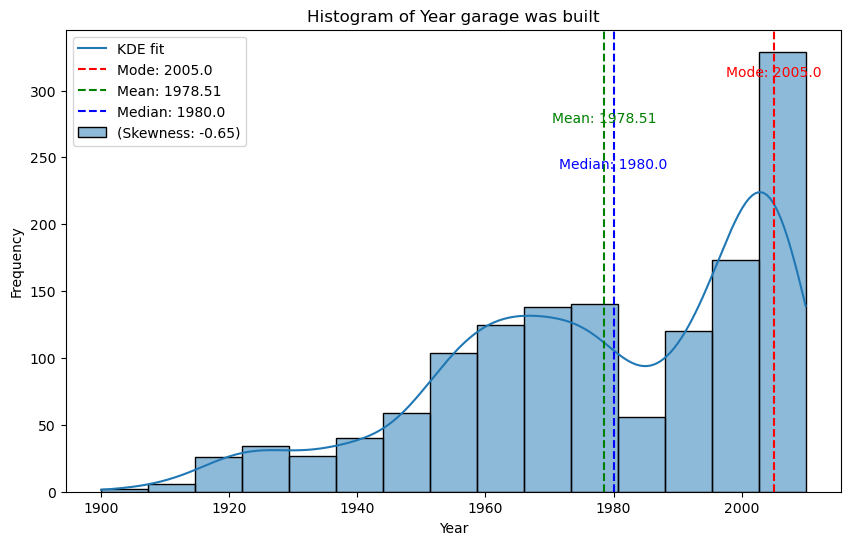

In [27]:
analyze_column(data_train, 'GarageYrBlt', xlabel='Year',title= 'Year garage was built')

<div style="background-color: lightblue; padding: 12px; border-radius: 5px;">
    
<b>Infer
    
For imputing the missing value in this context, the Median can be a choice for imputation.
 
</div>

In [28]:
data_train['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [29]:
# Calculate the mode
median_value = data_train['GarageYrBlt'].median()

# Impute the missing value with the mode
data_train['GarageYrBlt'].fillna(median_value, inplace=True)

In [30]:
data_train['GarageYrBlt'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageYrBlt
Non-Null Count  Dtype  
--------------  -----  
1460 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [31]:
numeric_nan_columns.remove('GarageYrBlt')
numeric_nan_columns

[]

## NNext Step

<div style="background-color: lightgreen; padding: 12px; border-radius: 5px;">

<b>Next Step<b>

All the missing values of the attributes having the numeric values are replaced.

next step is to Dealing with missing values of the attributes having the non-numeric values.
</div>

In [32]:
non_numeric_nan_columns = list(set(nan_columns) & set(categorical_features))
print(non_numeric_nan_columns,'\n')

['MiscFeature', 'Electrical', 'Fence', 'GarageCond', 'BsmtFinType1', 'PoolQC', 'GarageQual', 'Alley', 'BsmtQual', 'BsmtExposure', 'MasVnrType', 'FireplaceQu', 'GarageType', 'BsmtFinType2', 'BsmtCond', 'GarageFinish'] 



<div style="background-color: lightblue; padding: 12px; border-radius: 5px;">
    
<b>Infer
    
 replacinf the NaN values with 'NONE' to Marking NaN Values as a Separate Category.
 
</div>

In [33]:
data_train[non_numeric_nan_columns] = data_train[non_numeric_nan_columns].fillna('NONE')

MiscFeature:
Miscellaneous feature not covered in other categories
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
MiscFeature
NONE    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64


<Figure size 600x400 with 0 Axes>

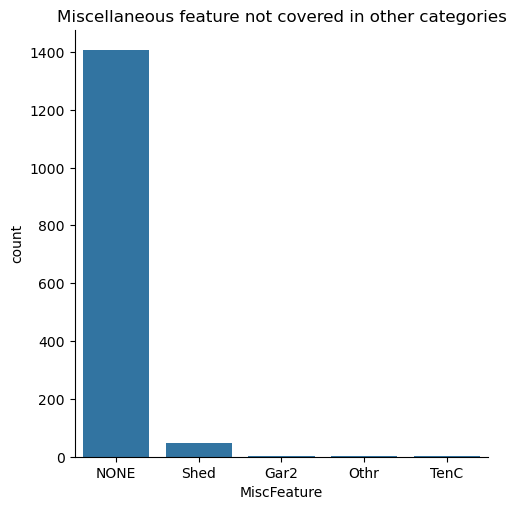

---------------------------
Electrical:
Electrical system
       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NONE        1
Name: count, dtype: int64


<Figure size 600x400 with 0 Axes>

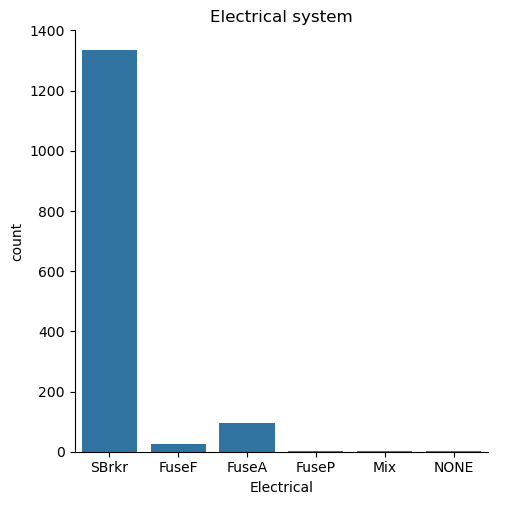

---------------------------
Fence:
Fence quality
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
Fence
NONE     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64


<Figure size 600x400 with 0 Axes>

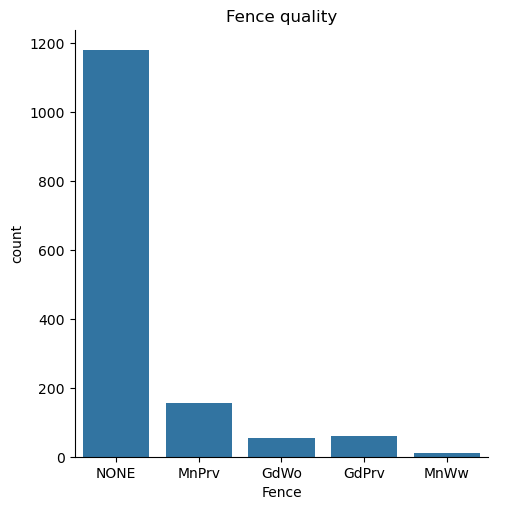

---------------------------
GarageCond:
Garage condition
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
GarageCond
TA      1326
NONE      81
Fa        35
Gd         9
Po         7
Ex         2
Name: count, dtype: int64


<Figure size 600x400 with 0 Axes>

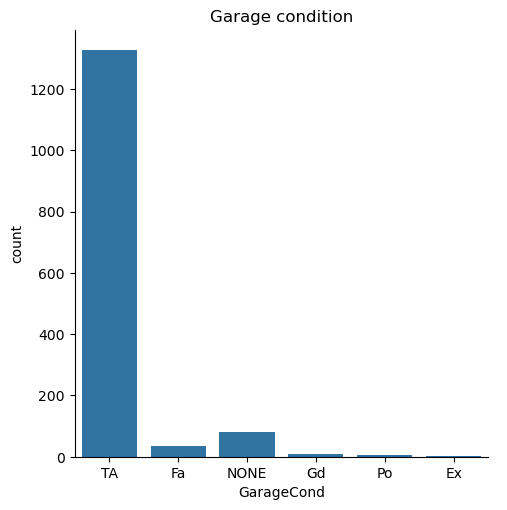

---------------------------
BsmtFinType1:
Rating of basement finished area
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
BsmtFinType1
Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
NONE     37
Name: count, dtype: int64


<Figure size 600x400 with 0 Axes>

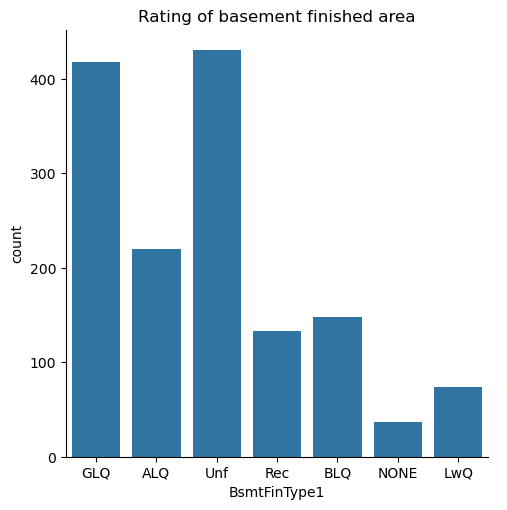

---------------------------
PoolQC:
Pool quality
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
PoolQC
NONE    1453
Gd         3
Ex         2
Fa         2
Name: count, dtype: int64


<Figure size 600x400 with 0 Axes>

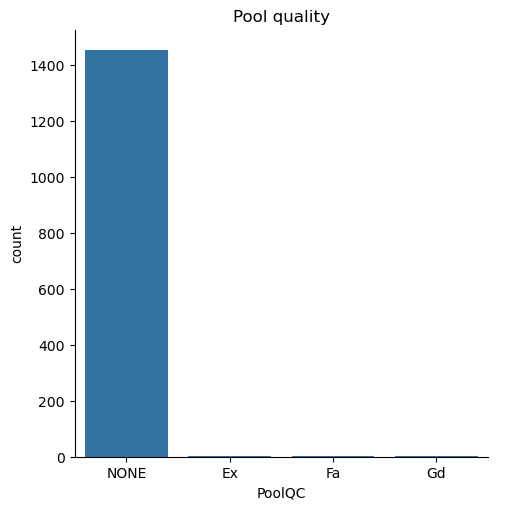

---------------------------
GarageQual:
Garage quality
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
GarageQual
TA      1311
NONE      81
Fa        48
Gd        14
Ex         3
Po         3
Name: count, dtype: int64


<Figure size 600x400 with 0 Axes>

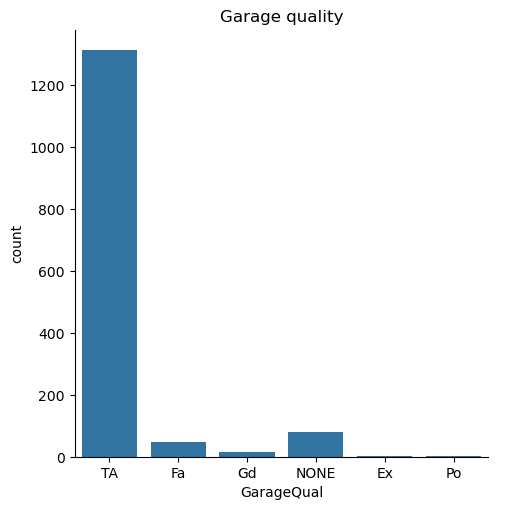

---------------------------
Alley:
Type of alley access to property
       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
Alley
NONE    1369
Grvl      50
Pave      41
Name: count, dtype: int64


<Figure size 600x400 with 0 Axes>

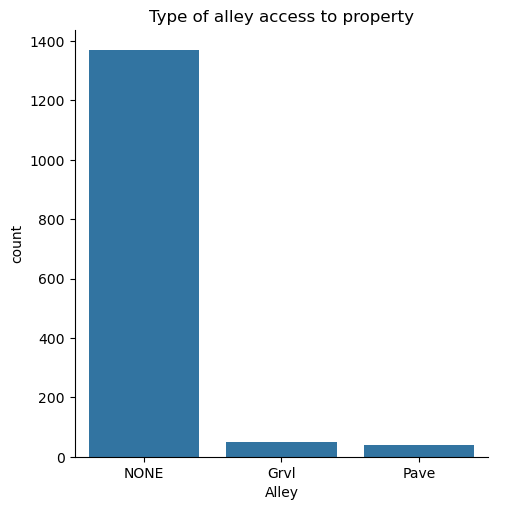

---------------------------
BsmtQual:
Evaluates the height of the basement
       Ex	Excellent (100+ inches)
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
BsmtQual
TA      649
Gd      618
Ex      121
NONE     37
Fa       35
Name: count, dtype: int64


<Figure size 600x400 with 0 Axes>

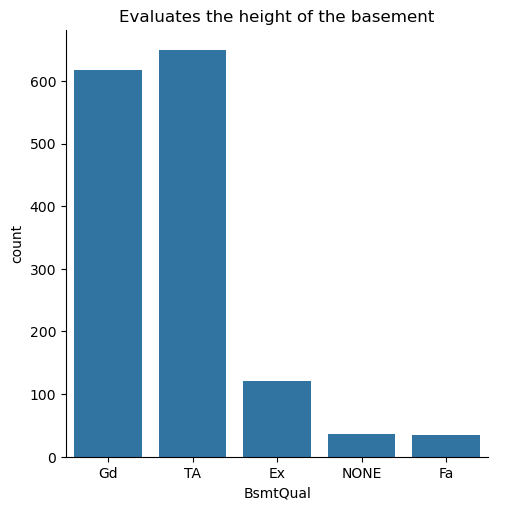

---------------------------
BsmtExposure:
Refers to walkout or garden level walls
       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
BsmtExposure
No      953
Av      221
Gd      134
Mn      114
NONE     38
Name: count, dtype: int64


<Figure size 600x400 with 0 Axes>

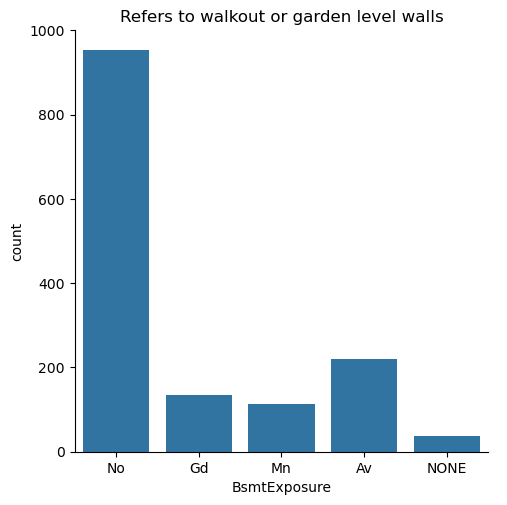

---------------------------
MasVnrType:
Masonry veneer type
       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
MasVnrType
NONE       872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64


<Figure size 600x400 with 0 Axes>

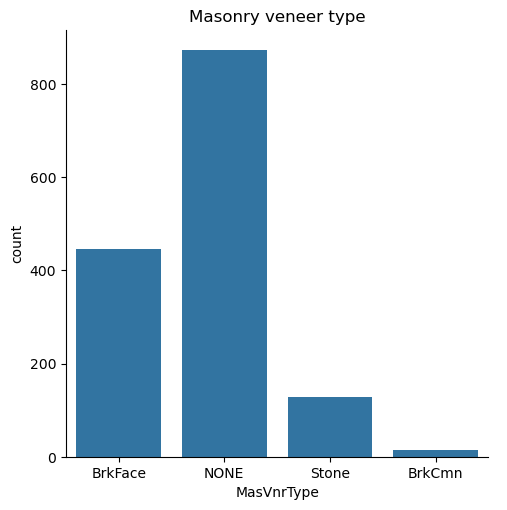

---------------------------
FireplaceQu:
Fireplace quality
       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
FireplaceQu
NONE    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: count, dtype: int64


<Figure size 600x400 with 0 Axes>

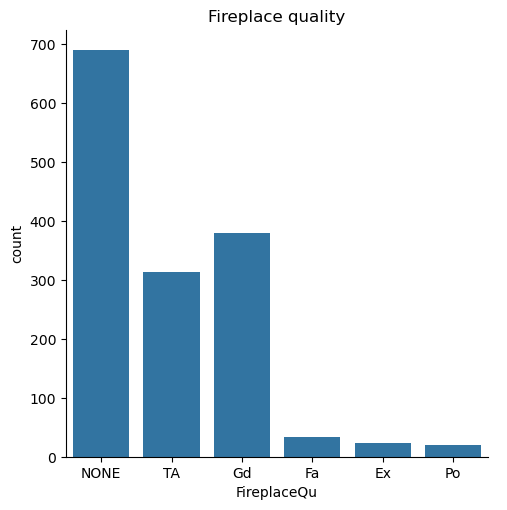

---------------------------
GarageType:
Garage location
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
GarageType
Attchd     870
Detchd     387
BuiltIn     88
NONE        81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64


<Figure size 600x400 with 0 Axes>

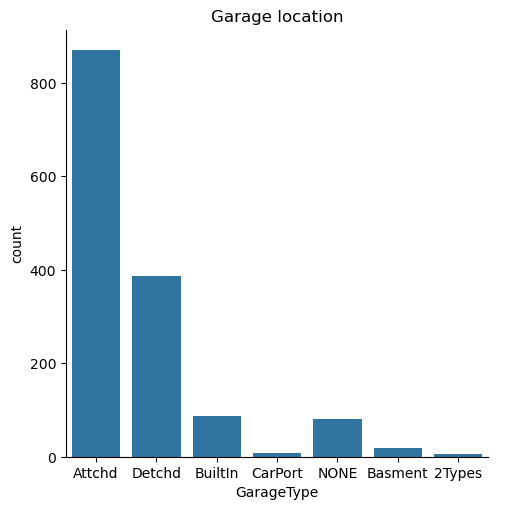

---------------------------
BsmtFinType2:
Rating of basement finished area (if multiple types)
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
BsmtFinType2
Unf     1256
Rec       54
LwQ       46
NONE      38
BLQ       33
ALQ       19
GLQ       14
Name: count, dtype: int64


<Figure size 600x400 with 0 Axes>

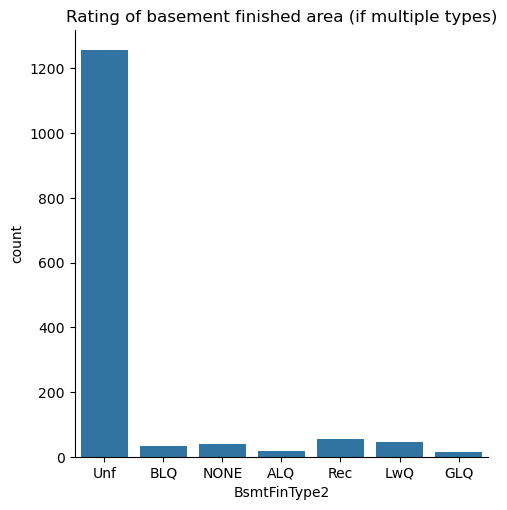

---------------------------
BsmtCond:
Evaluates the general condition of the basement
       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
BsmtCond
TA      1311
Gd        65
Fa        45
NONE      37
Po         2
Name: count, dtype: int64


<Figure size 600x400 with 0 Axes>

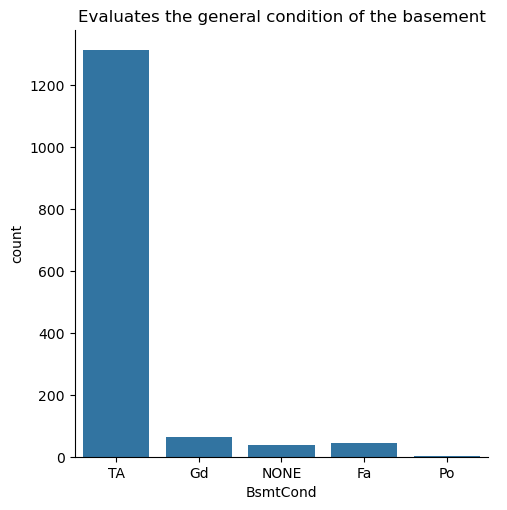

---------------------------
GarageFinish:
Interior finish of the garage
       Fin	Finished
       RFn	Rough Finished
       Unf	Unfinished
       NA	No Garage
GarageFinish
Unf     605
RFn     422
Fin     352
NONE     81
Name: count, dtype: int64


<Figure size 600x400 with 0 Axes>

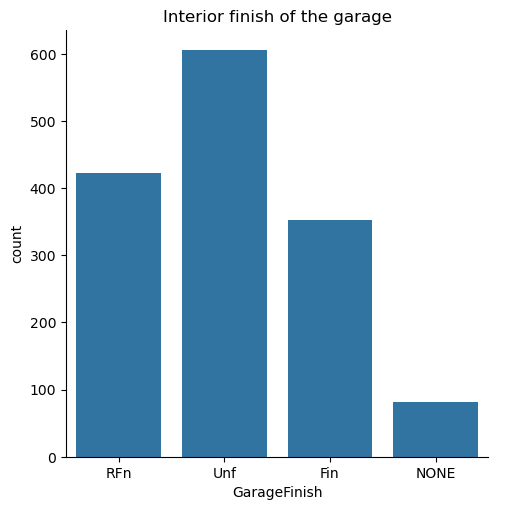

---------------------------


In [34]:
for attribute in non_numeric_nan_columns:
    #attribute description
    attribute_name = attribute
    print(get_attribute_description('data_description.txt', attribute_name))
    
    data_train_attribute=data_train[attribute_name].value_counts(dropna=False)
    print(data_train_attribute)
    plt.figure(figsize=(6, 4))
    sns.catplot(x=attribute, kind="count", data=data_train[[attribute_name]], estimator='value')
    plt.title(get_attribute_description('data_description.txt', attribute_name).split('\n')[1])
    plt.show()
    print('---------------------------')

In [35]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NONE,Reg,Lvl,AllPub,...,0,NONE,NONE,NONE,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NONE,Reg,Lvl,AllPub,...,0,NONE,NONE,NONE,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NONE,IR1,Lvl,AllPub,...,0,NONE,NONE,NONE,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NONE,IR1,Lvl,AllPub,...,0,NONE,NONE,NONE,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NONE,IR1,Lvl,AllPub,...,0,NONE,NONE,NONE,0,12,2008,WD,Normal,250000


# Exploratory Data Analysis (EDA)
EDA on a dataset with 79 features requires a systematic approach to manage and explore the data effectively. Start with understanding the data and handling missing values, then move on to univariate and multivariate analysis, and use dimensionality reduction techniques to simplify and visualize the data. The goal is to extract key insights and prepare the data for the next steps in your data science project.

## House Price Distribution

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\physa\AppData\Local\Temp\ipykernel_19488\581122253.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})


<Axes: xlabel='SalePrice', ylabel='Density'>

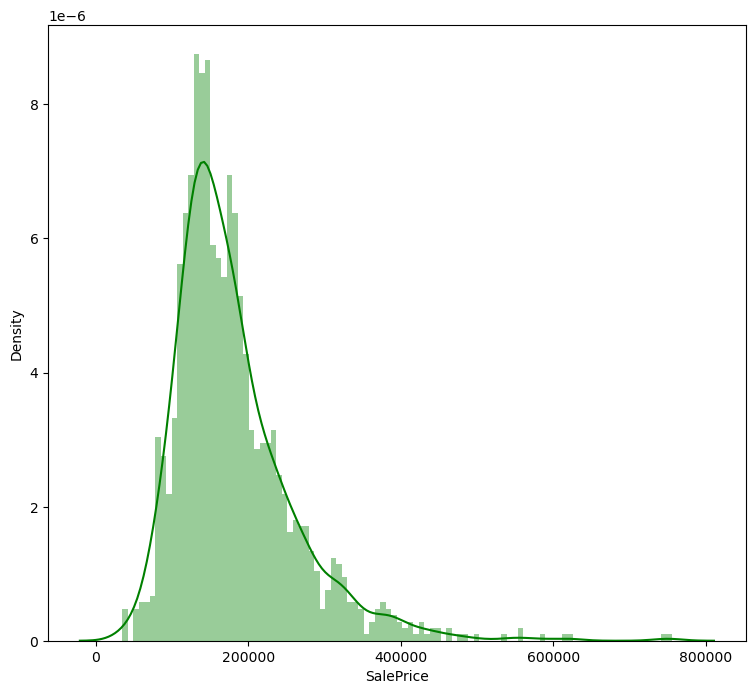

In [40]:
# House Price Distribution
print(data_train['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data_train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4})

## Univariate Analysis

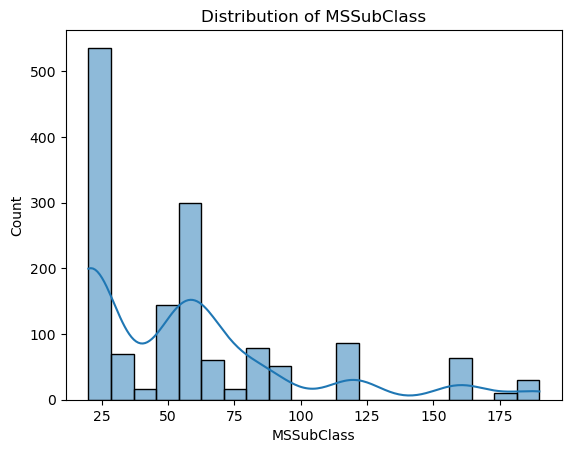

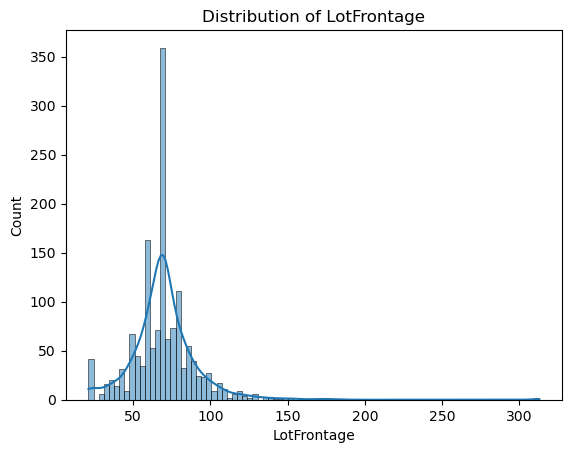

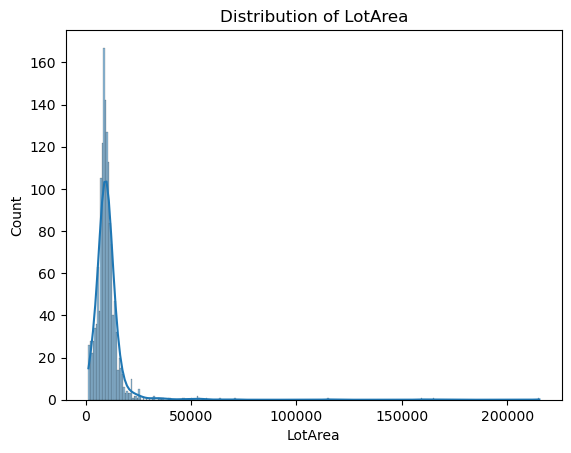

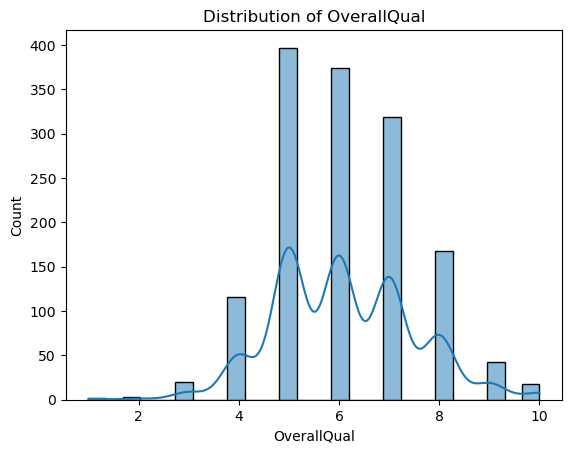

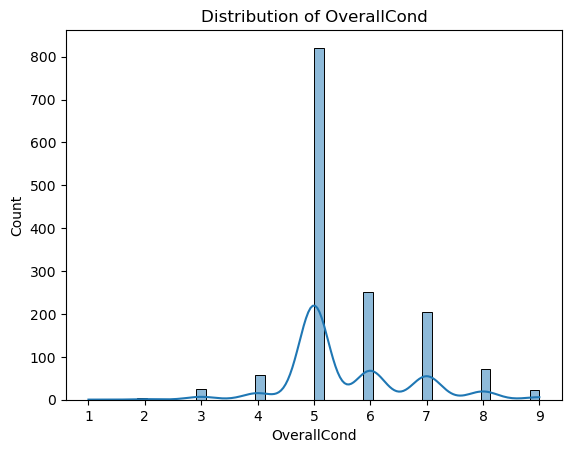

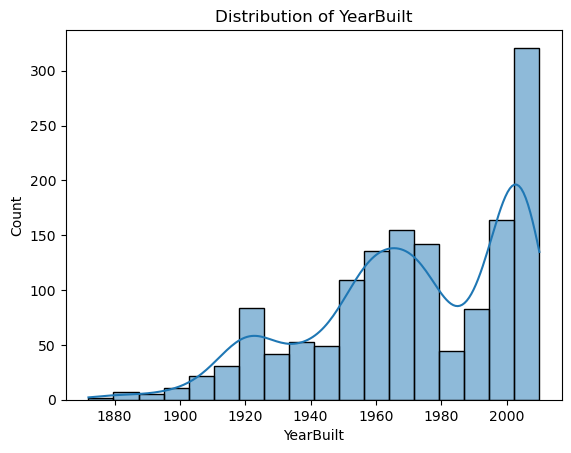

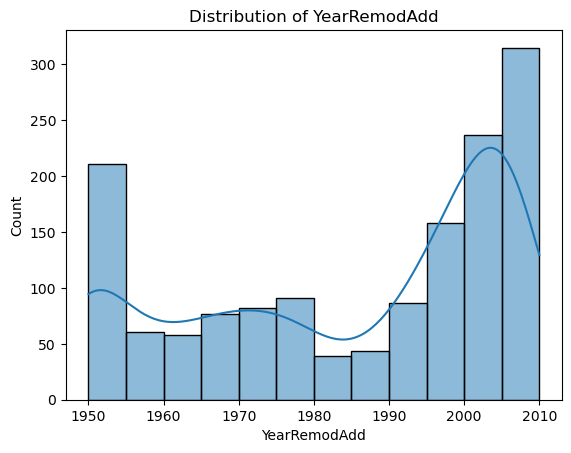

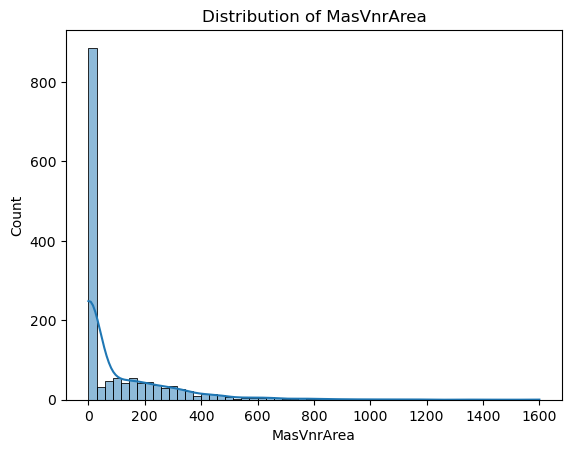

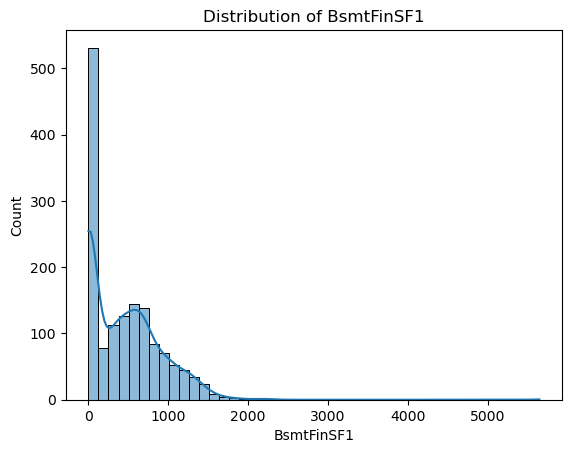

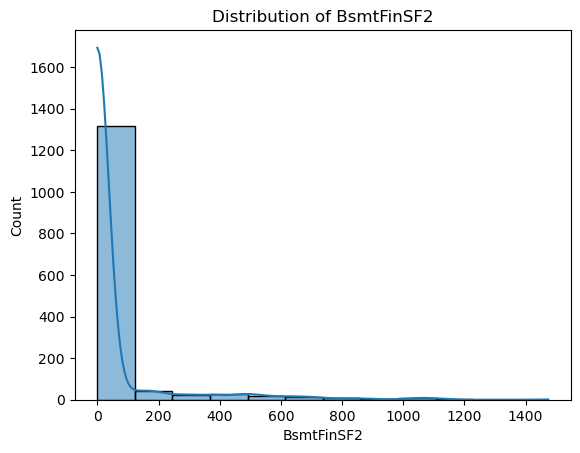

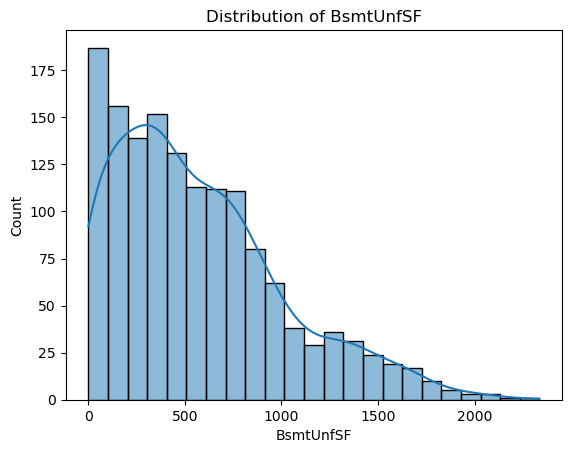

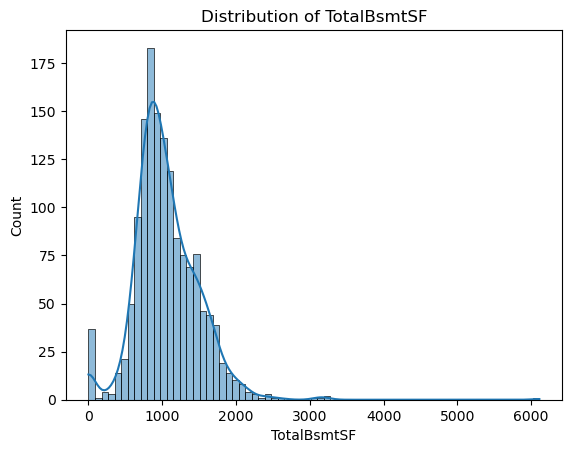

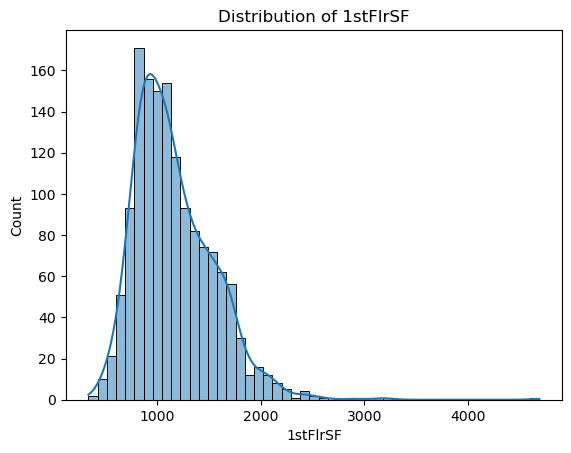

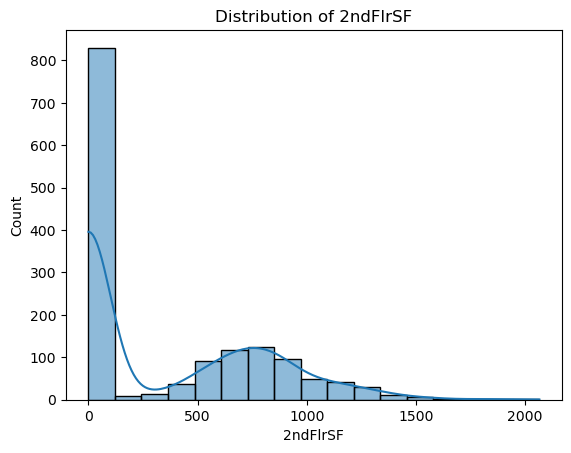

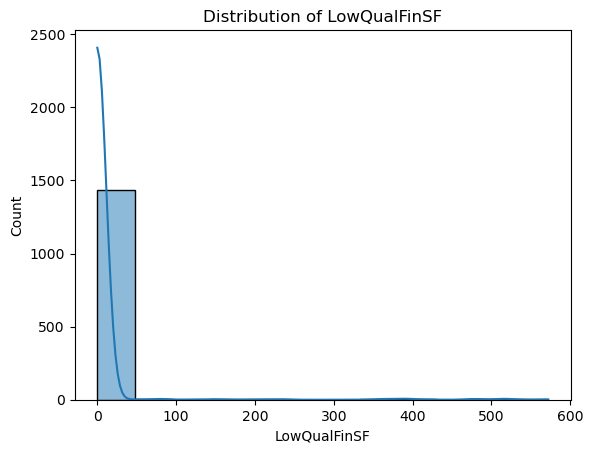

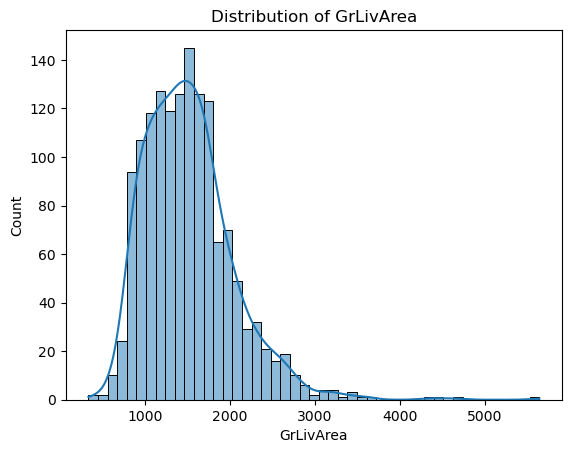

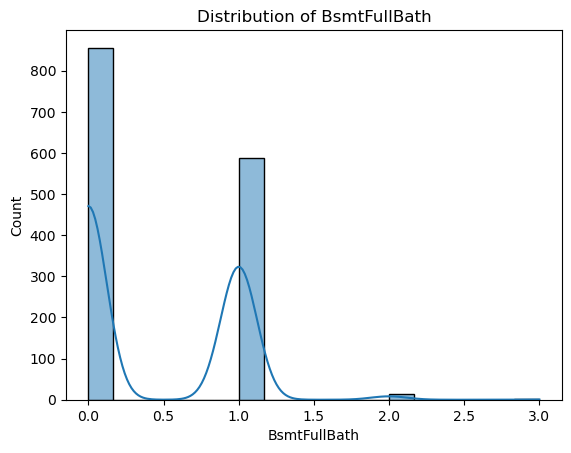

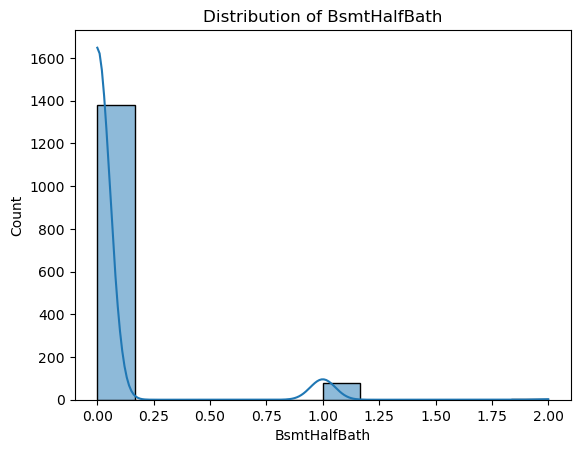

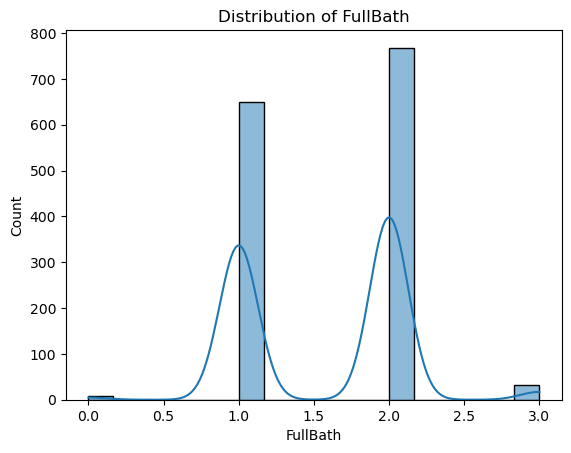

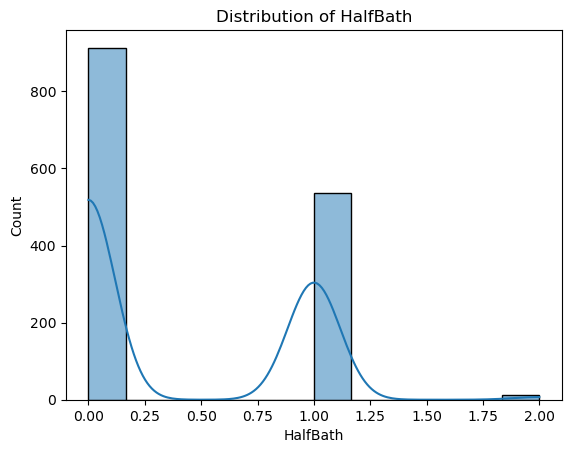

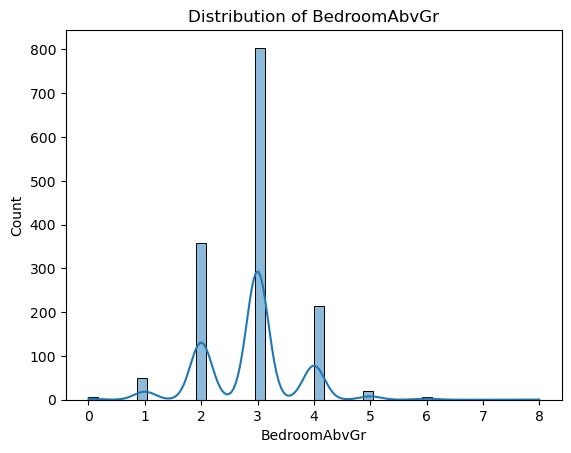

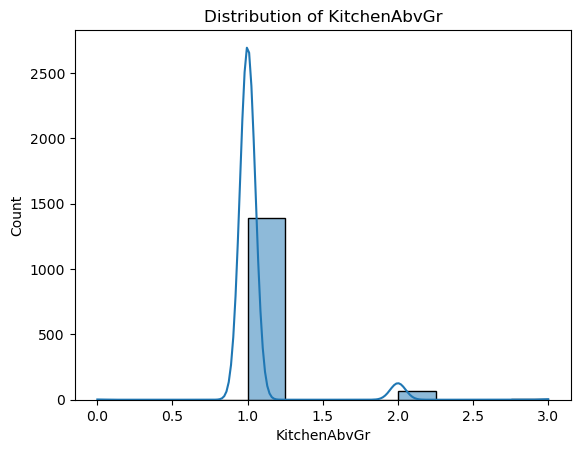

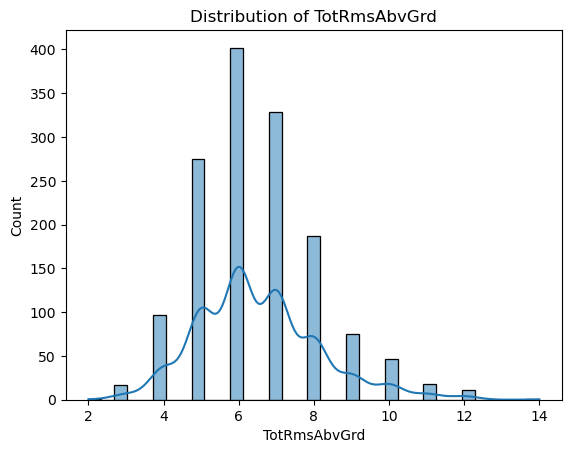

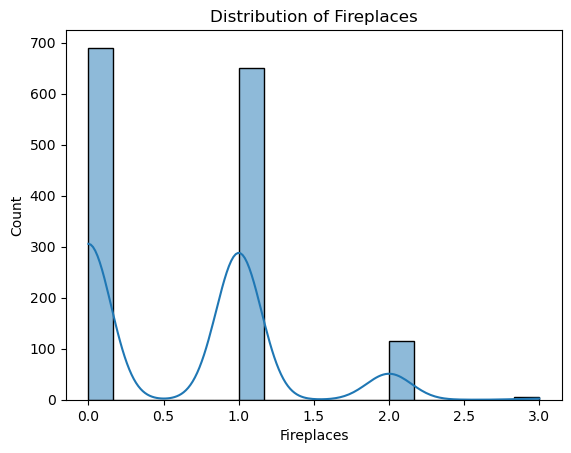

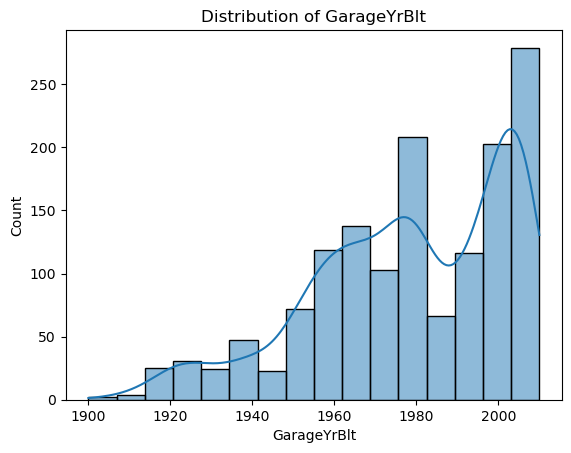

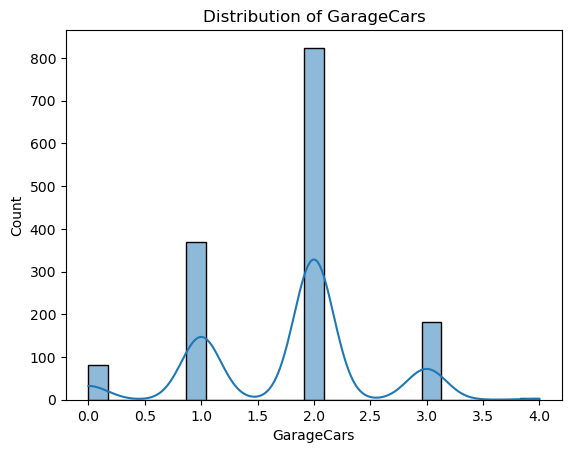

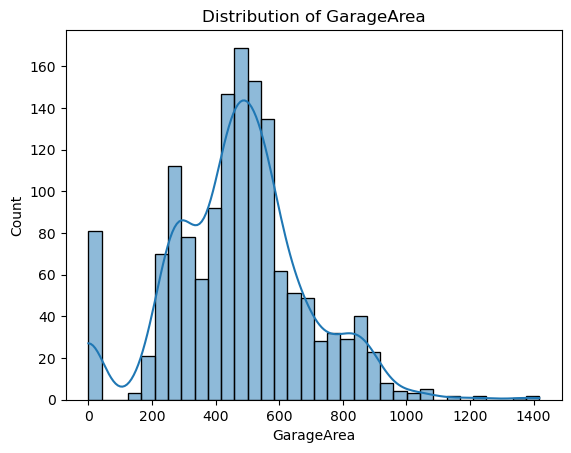

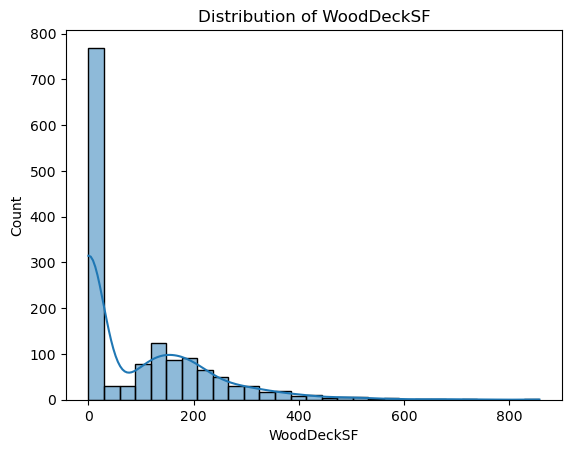

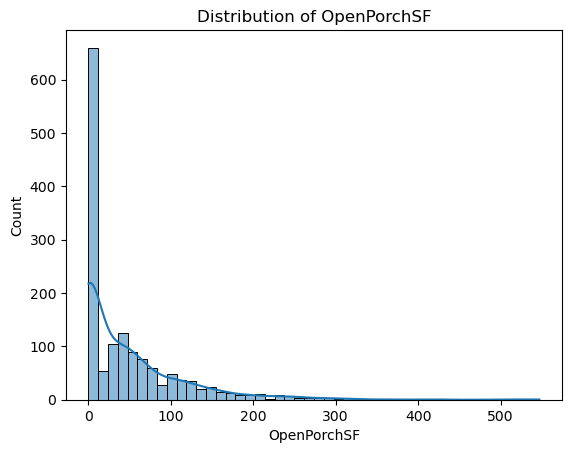

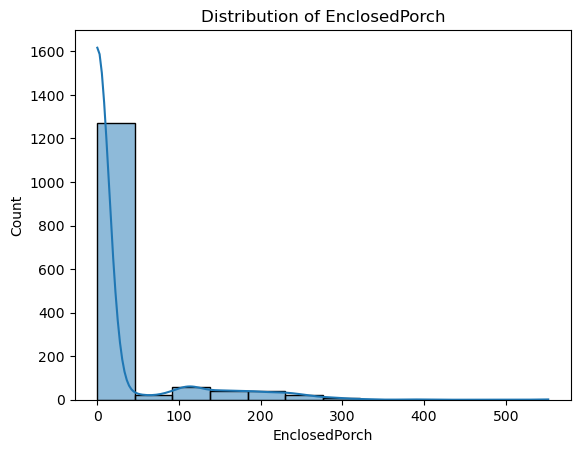

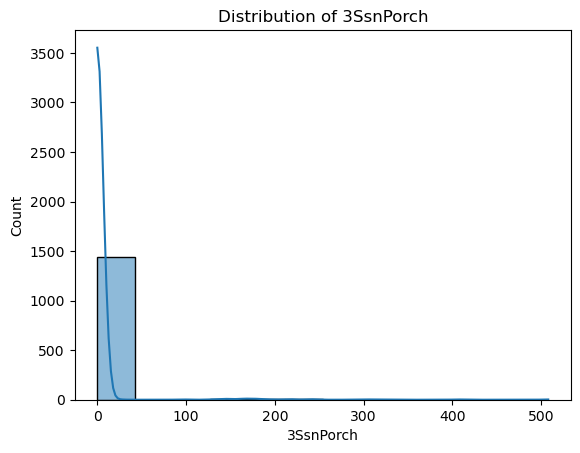

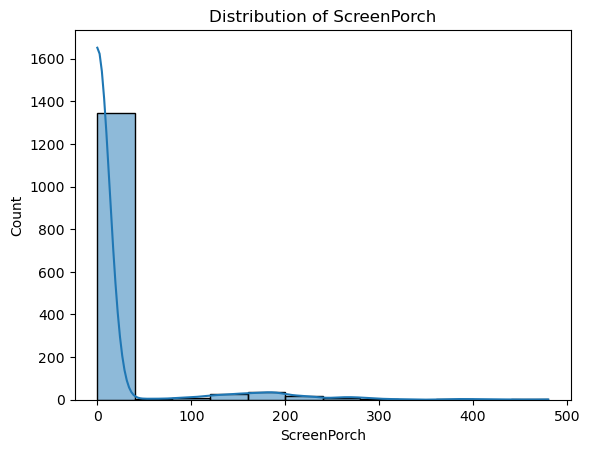

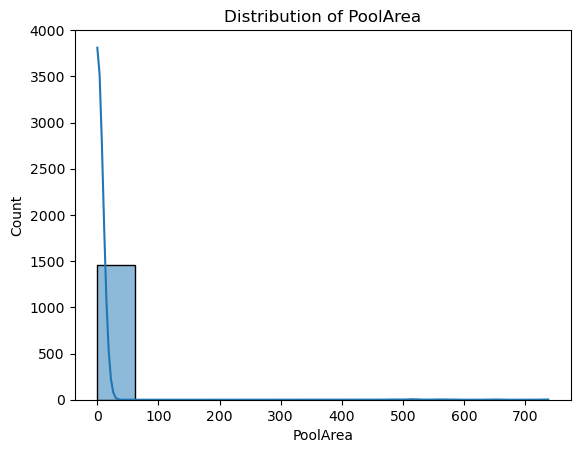

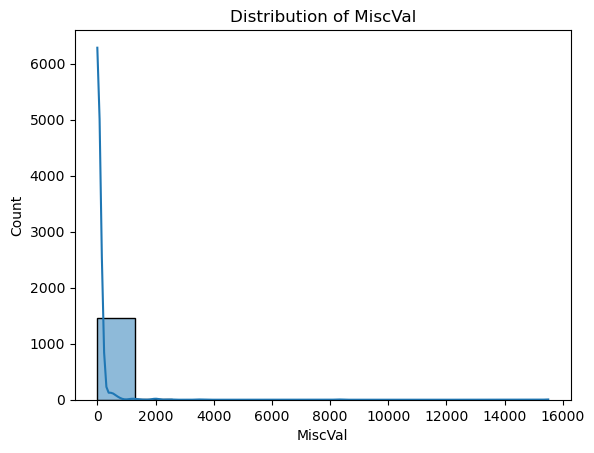

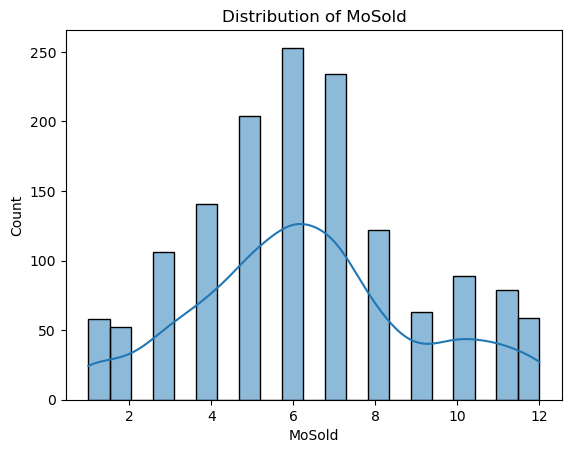

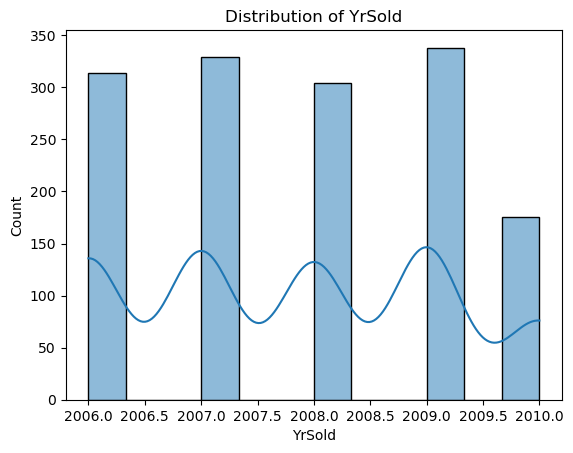

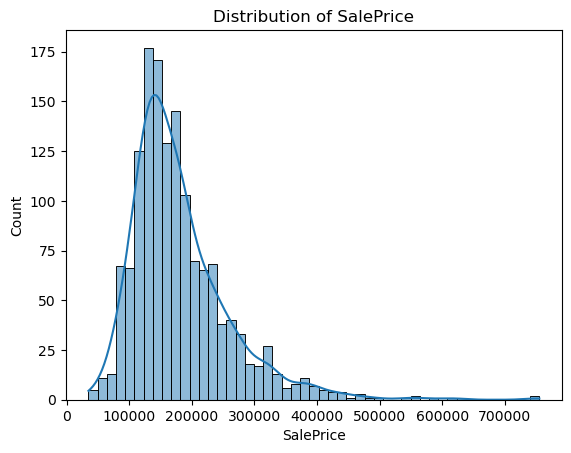

In [41]:
for col in numerical_features:
    sns.histplot(data_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

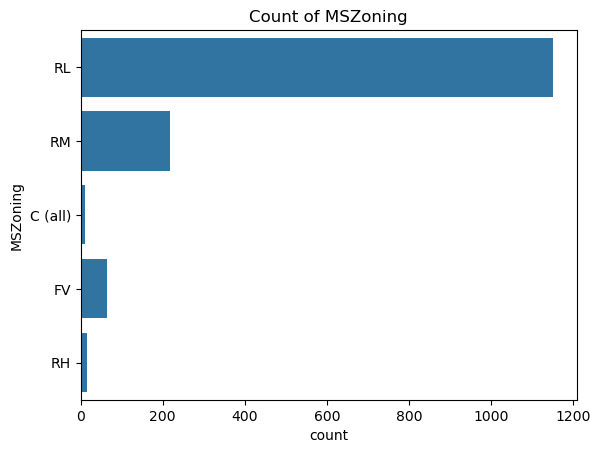

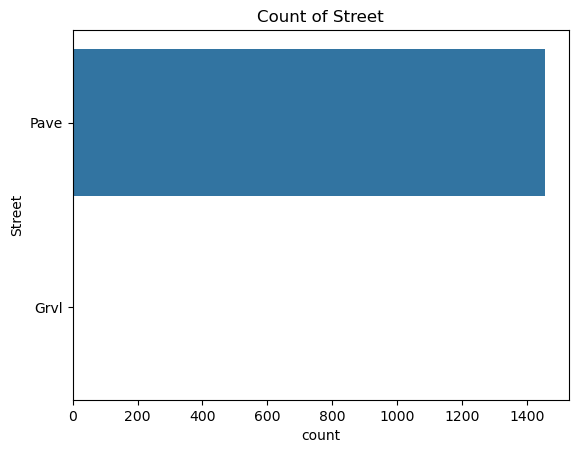

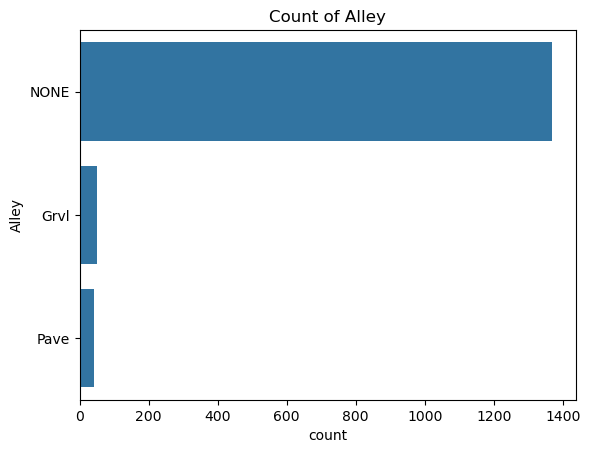

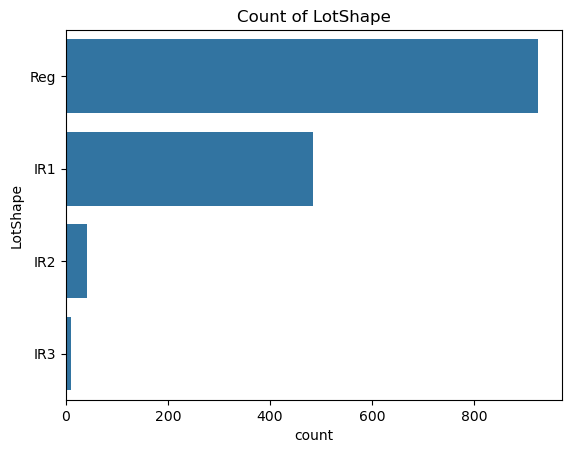

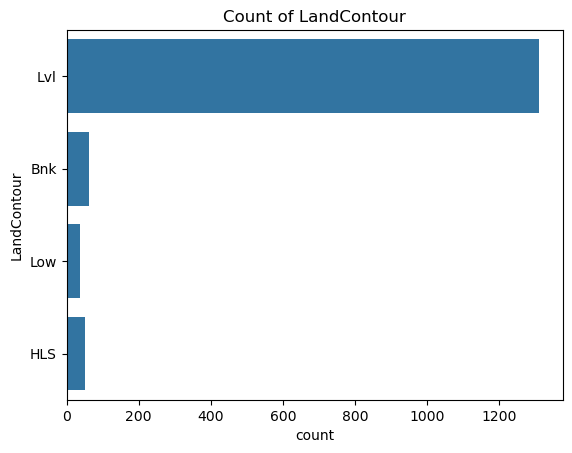

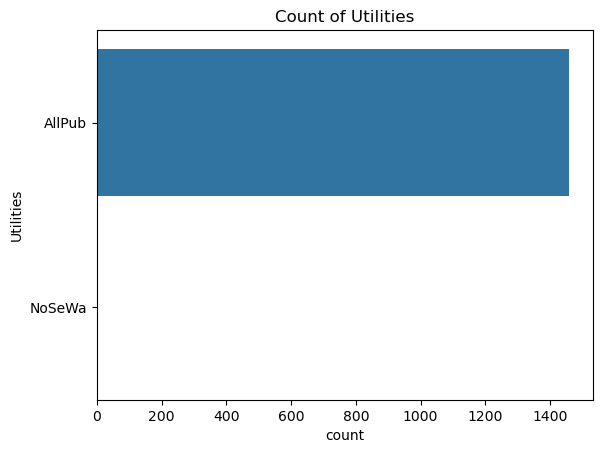

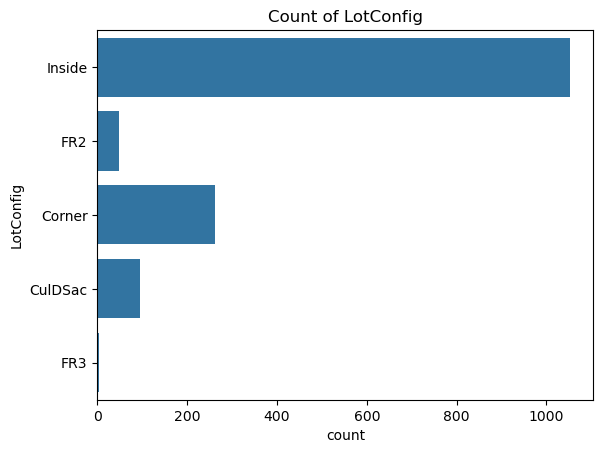

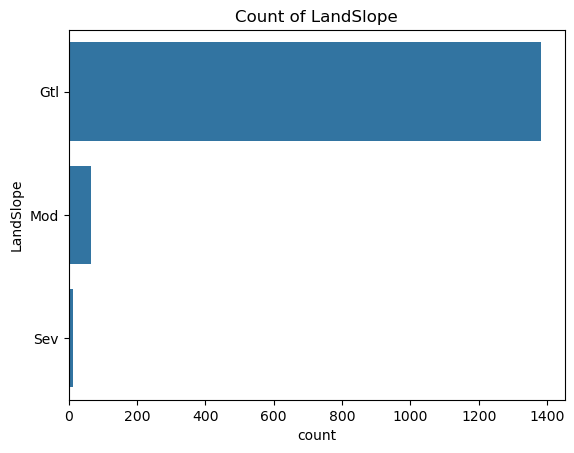

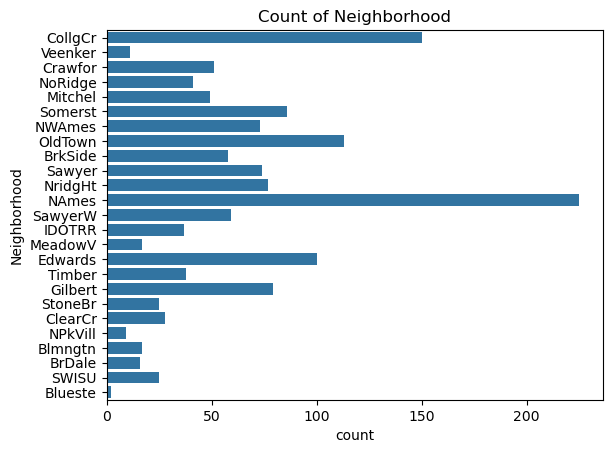

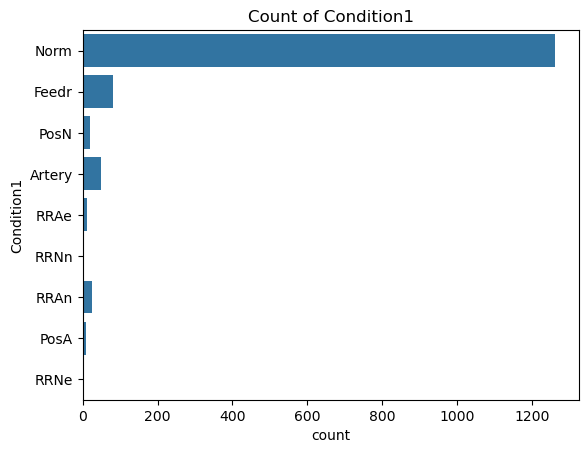

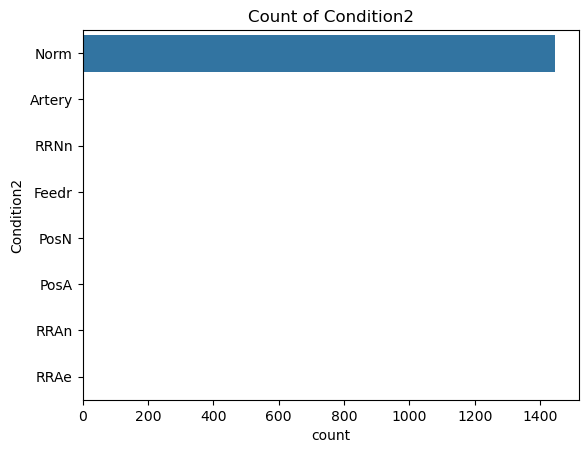

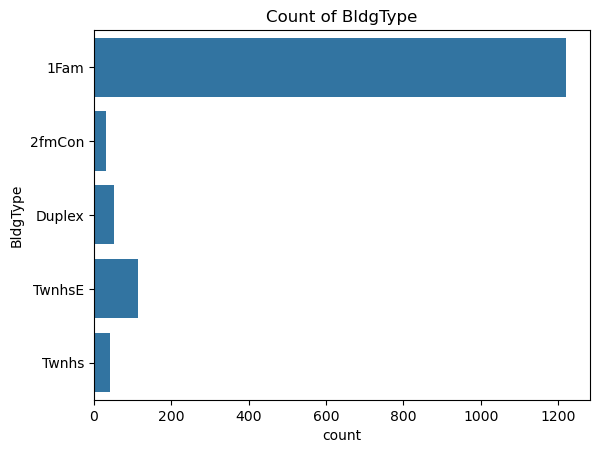

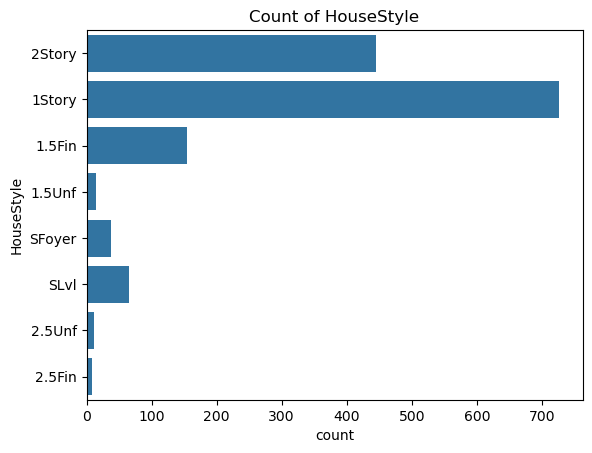

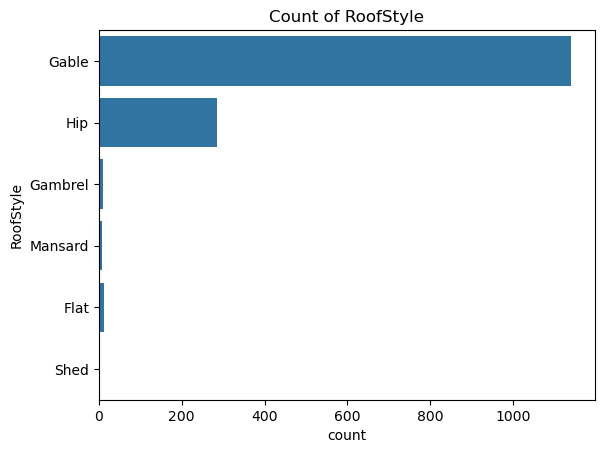

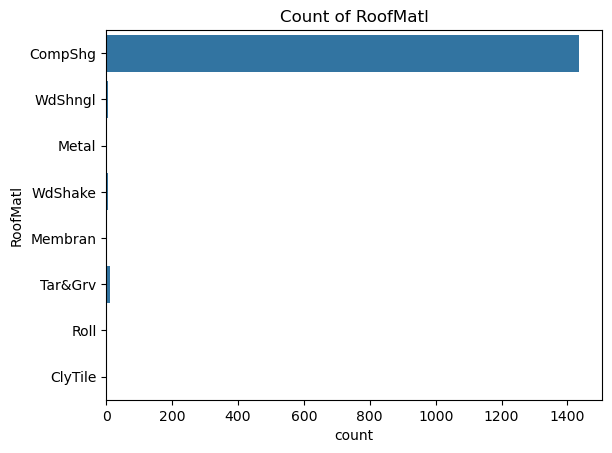

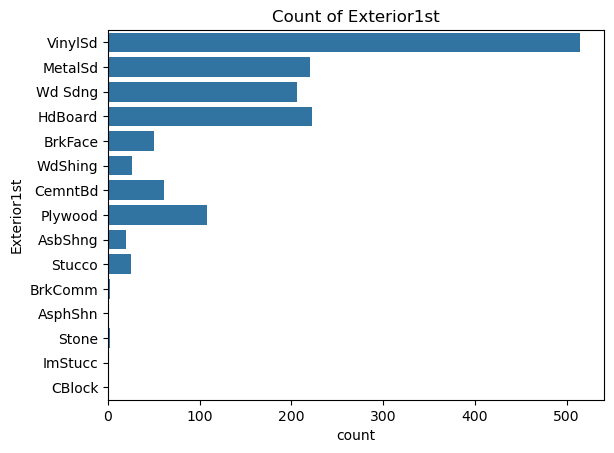

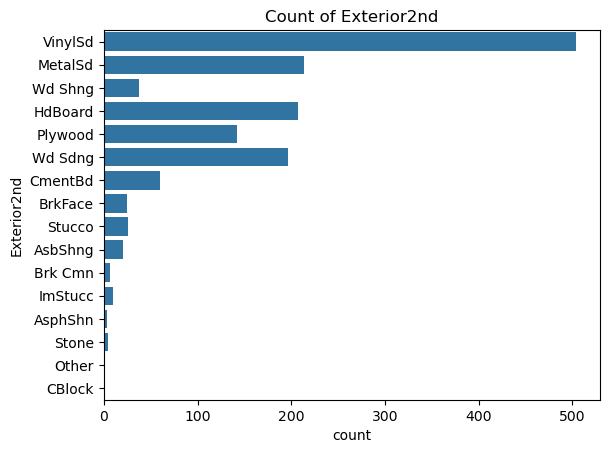

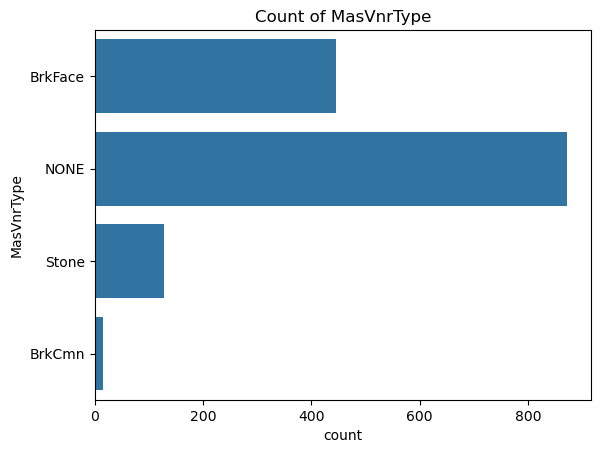

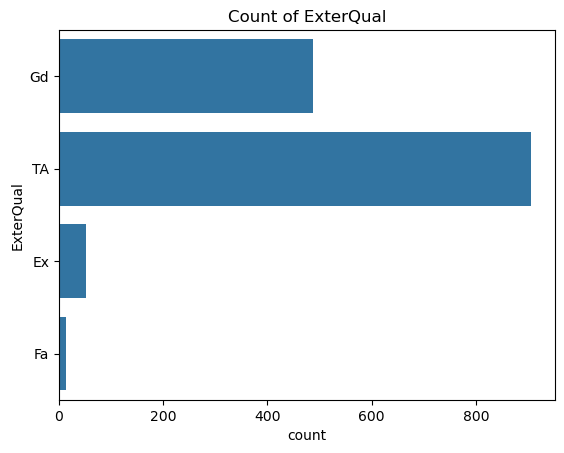

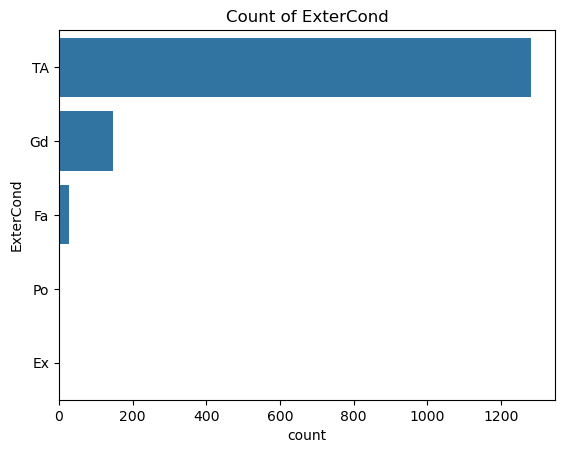

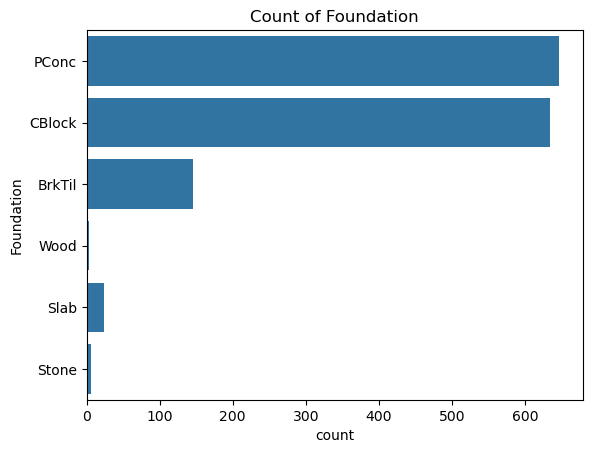

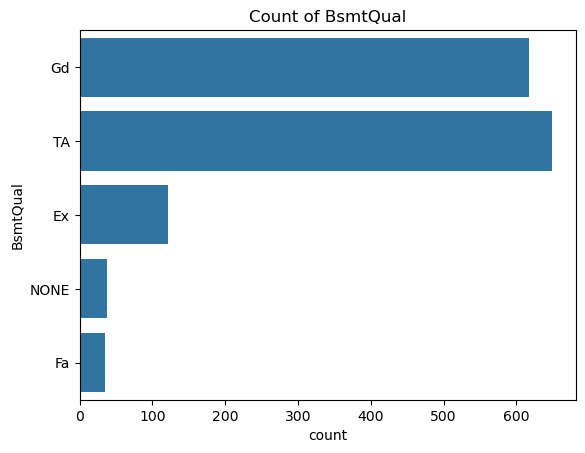

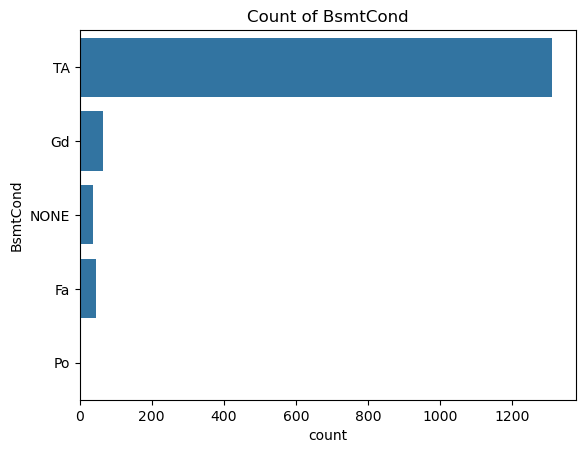

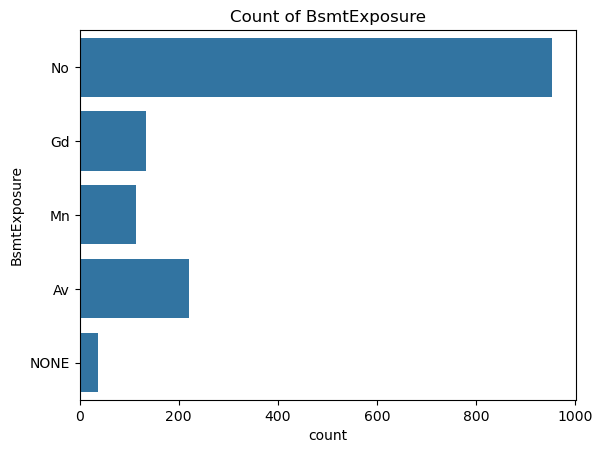

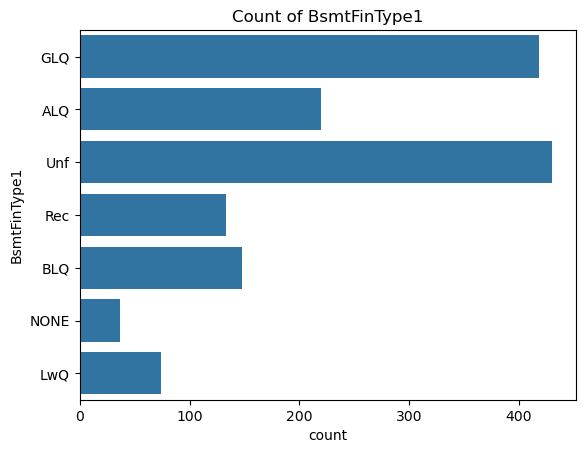

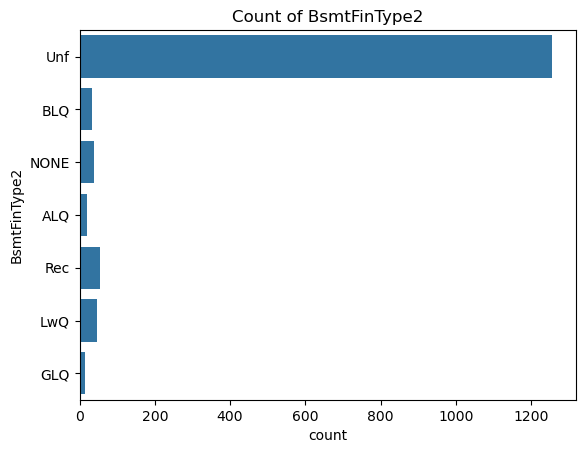

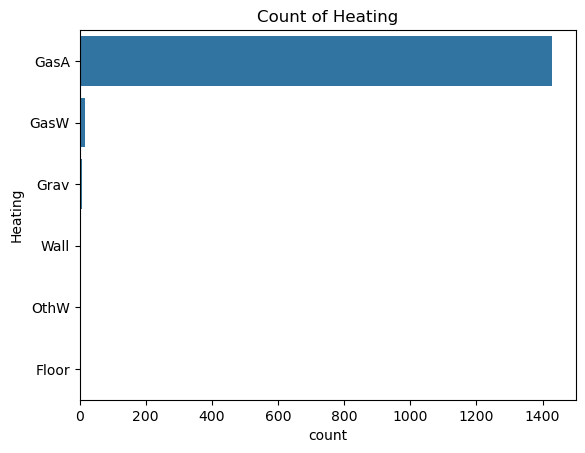

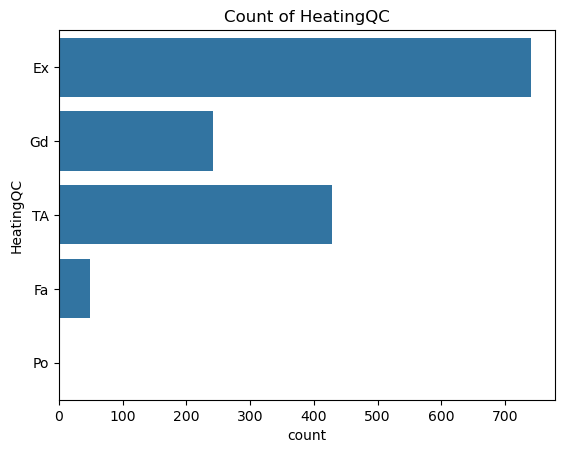

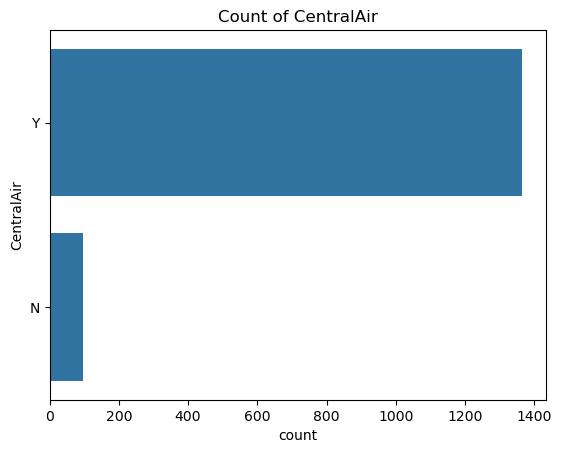

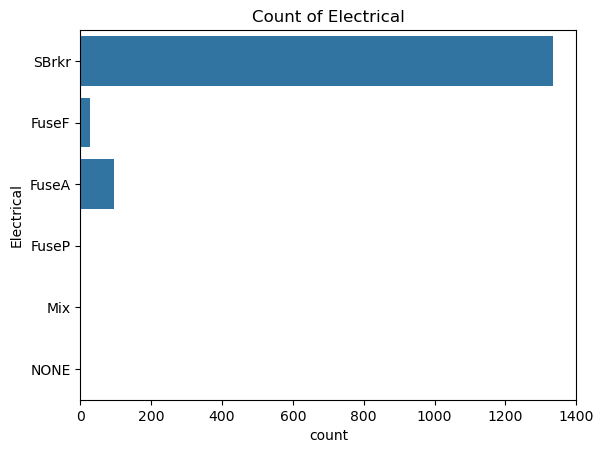

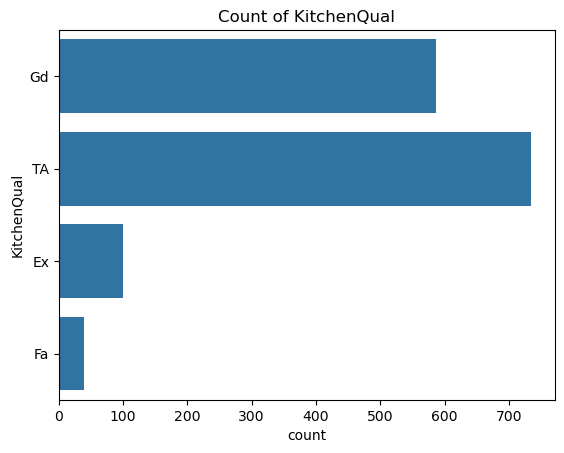

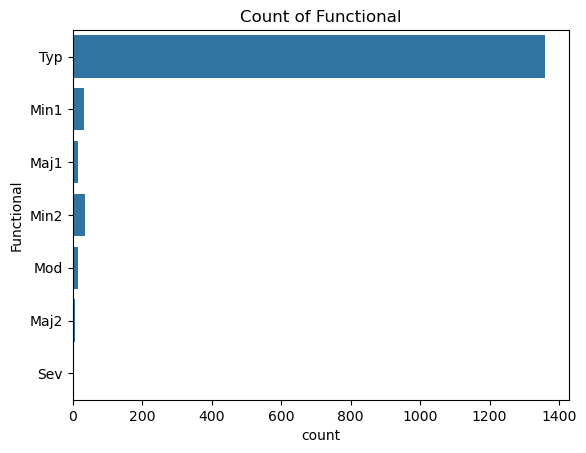

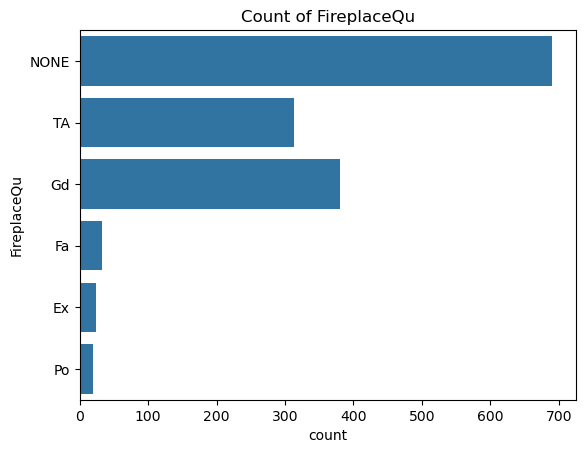

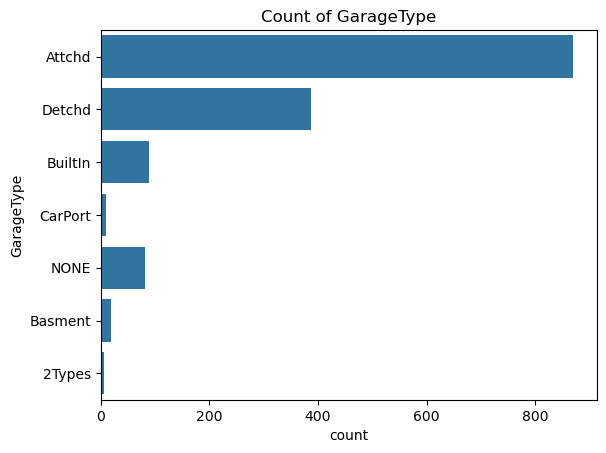

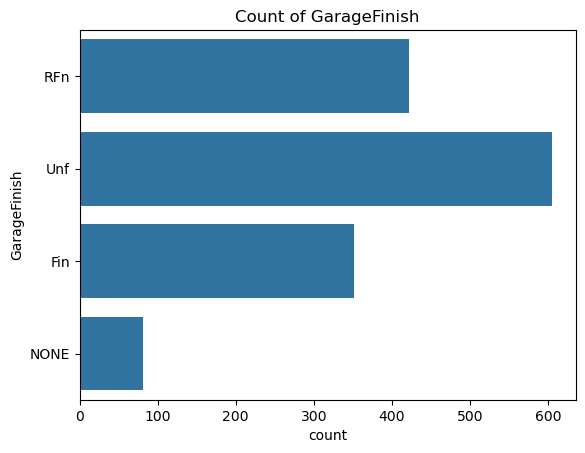

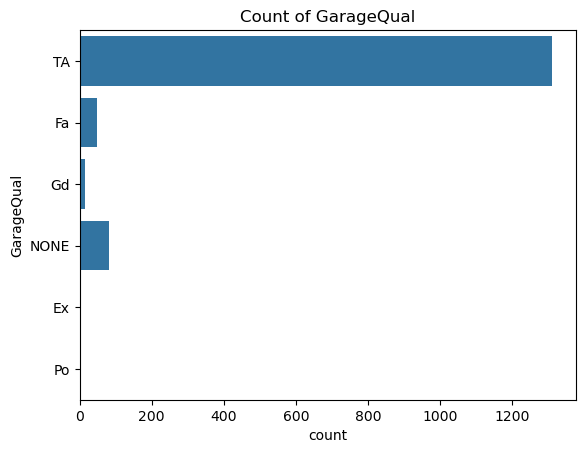

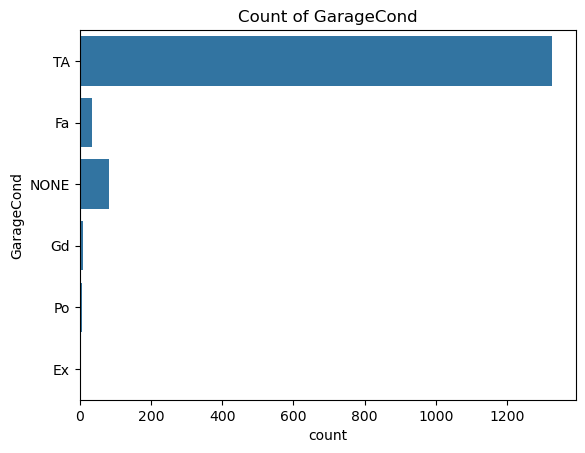

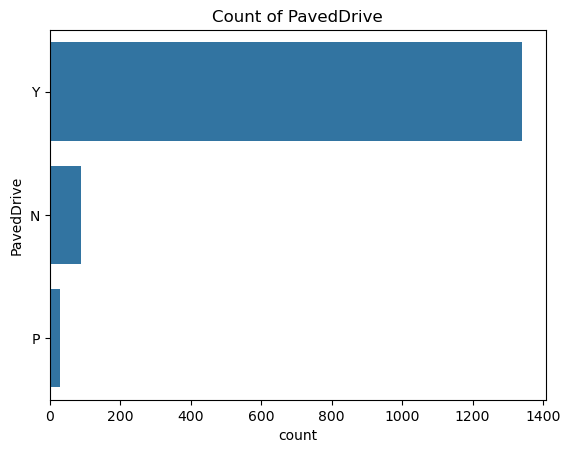

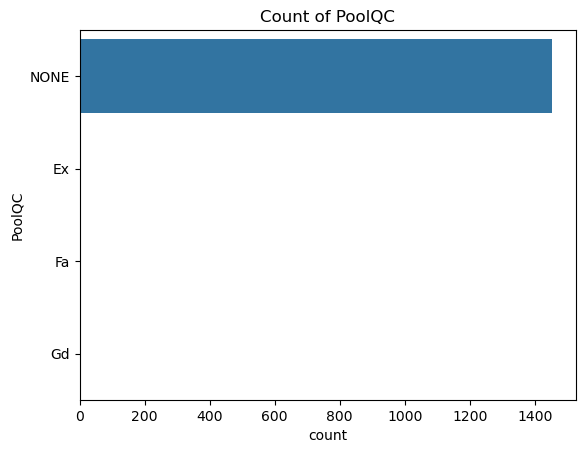

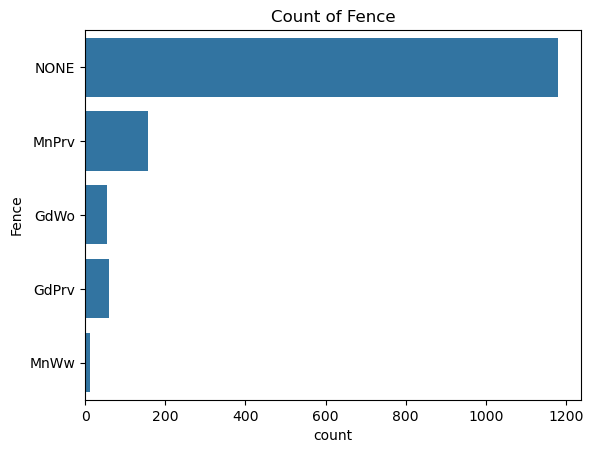

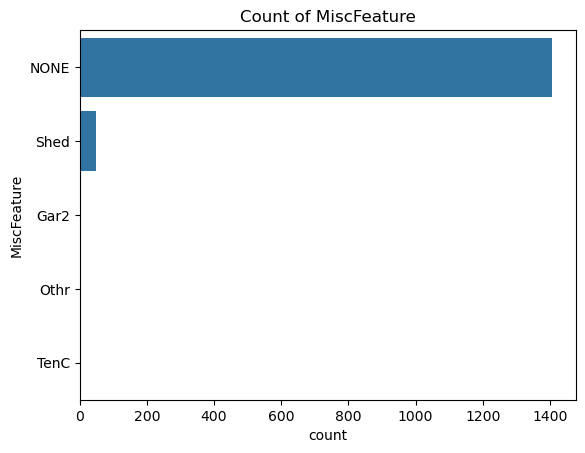

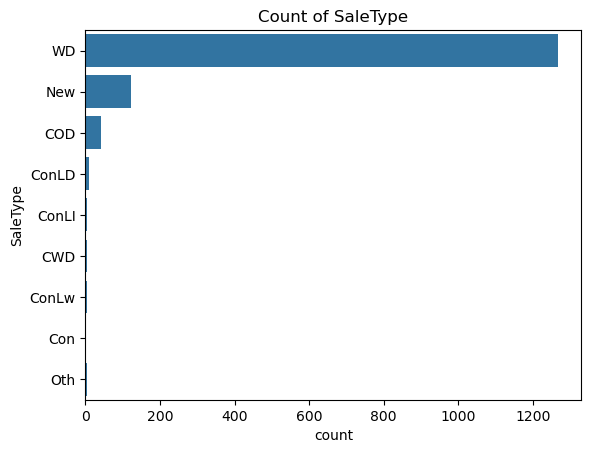

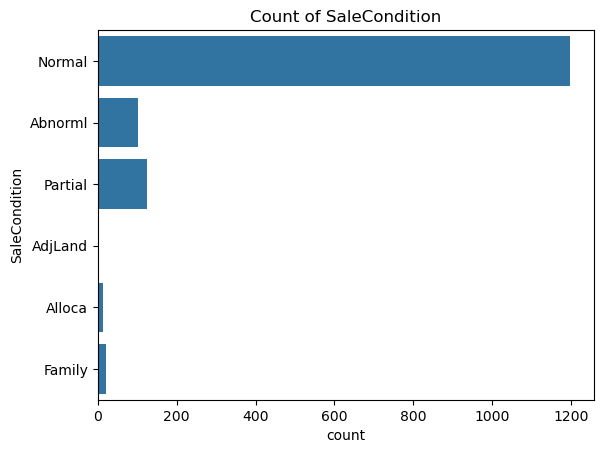

In [42]:
for col in categorical_features:
    sns.countplot(y=data_train[col])
    plt.title(f'Count of {col}')
    plt.show()


## Multivariate Analysis

<Axes: >

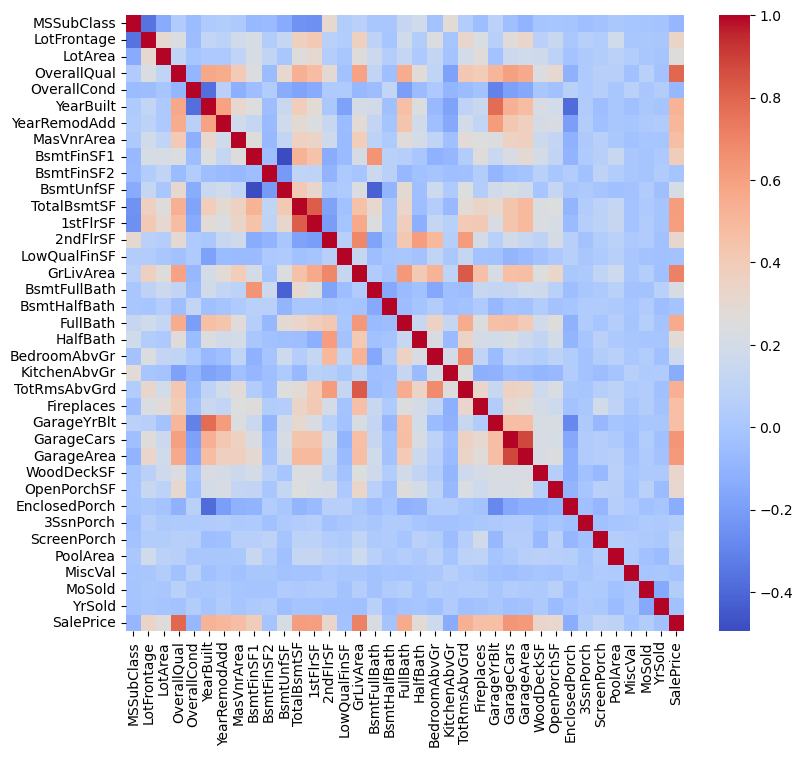

In [45]:
#Correlation Matrix: For numerical features, compute and visualize the correlation matrix to see relationships between features.
corr_matrix = data_train[numerical_features].corr()
plt.figure(figsize=(9, 8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm")


# Interactive Visual Analytics
Objectives:
* Intreactive visual analytics using Folium, Plotly Dash, etc.

# Predictive Analysis

Objectives:
* Standardize the data
* Split into training data and test data
* Finding best Hyperparameter for different models such as SVM, Classification Trees, Logistic Regression and etc.
* Find the method performs best using test data

# Results and Discusion

# Conclusion